## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 2

### Q2. You are provided with the FIFA-19 dataset (fifa19.csv).  The objective is to predict the 'Position' of a player using the following features: 
### • 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', ‘Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes' 
#### The positions are categorized as follows: 
#### o Goalkeeper: ["GK"] 
#### o Forward Player: ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"] 
#### o Midfielder Player: ["CM", "RCM", "LCM", "CDM", "RDM", "LDM", "CAM", "LAM", "RAM", "RM", "LM"] 
#### o Defender Player: ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"] 
 
### 1. Perform Data Pre-processing: Pre-process the data by cleaning, normalizing, and encoding as necessary. Include comment lines to explain each pre-processing step. 
 
### 2. Perform Model Training and Evaluation after splitting the dataset into training (80%), validation (10%), and test (10%) sets. 
 
### a) Experiment with neural network architectures using 1, 2, and 3 hidden layers. Experimentally determine the optimal number of neurons for each layer. 
 
### b) For each model, find the best number of epochs by visualizing and analyzing the training and validation loss against epochs. 
 
### c) Evaluate each model's performance using Accuracy, Precision, and Recall metrics. Display the classification report for the test set and comment on the class-wise performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv("fifa_19.csv", index_col=0)

In [4]:
columns_to_keep = [
    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
    'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
    'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
]
df = df[columns_to_keep + ['Position']]

df

Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
RowNumber                                                                 
0               95.0             70.0          90.0     86.0       97.0   
1               94.0             89.0          81.0     87.0       88.0   
2               87.0             62.0          84.0     84.0       96.0   
3               13.0             21.0          50.0     13.0       18.0   
4               82.0             55.0          92.0     82.0       86.0   
...              ...              ...           ...      ...        ...   
18202           38.0             40.0          49.0     25.0       42.0   
18203           52.0             52.0          43.0     36.0       39.0   
18204           40.0             46.0          38.0     38.0       45.0   
18205           50.0             39.0          42.0     40.0       51.0   
18206           34.0             46.0          48.0     30.0       43.0   

           Curve  FKAccuracy  LongPassing  BallControl  Acceleration  ...  \
RowNumber                                                             ...   
0           93.0        94.0         87.0         96.0          91.0  ...   
1           81.0        76.0         77.0         94.0          89.0  ...   
2           88.0        87.0         78.0         95.0          94.0  ...   
3           21.0        19.0         51.0         42.0          57.0  ...   
4           85.0        83.0         91.0         91.0          78.0  ...   
...          ...         ...          ...          ...           ...  ...   
18202       30.0        34.0         45.0         43.0          54.0  ...   
18203       32.0        20.0         25.0         40.0          41.0  ...   
18204       38.0        27.0         28.0         44.0          70.0  ...   
18205       34.0        32.0         32.0         52.0          61.0  ...   
18206       40.0        34.0         44.0         51.0          57.0  ...   

           Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
RowNumber                                                                
0               96.0     33.0            28.0           26.0       6.0   
1               95.0     28.0            31.0           23.0       7.0   
2               94.0     27.0            24.0           33.0       9.0   
3               68.0     15.0            21.0           13.0      90.0   
4               88.0     68.0            58.0           51.0      15.0   
...              ...      ...             ...            ...       ...   
18202           45.0     40.0            48.0           47.0      10.0   
18203           42.0     22.0            15.0           19.0      10.0   
18204           41.0     32.0            13.0           11.0       6.0   
18205           46.0     20.0            25.0           27.0      14.0   
18206           43.0     40.0            43.0           50.0      10.0   

           GKHandling  GKKicking  GKPositioning  GKReflexes  Position  
RowNumber                                                              
0                11.0       15.0           14.0         8.0        RF  
1                11.0       15.0           14.0        11.0        ST  
2                 9.0       15.0           15.0        11.0        LW  
3                85.0       87.0           88.0        94.0        GK  
4                13.0        5.0           10.0        13.0       RCM  
...               ...        ...            ...         ...       ...  
18202            13.0        7.0            8.0         9.0        CM  
18203             9.0        9.0            5.0        12.0        ST  
18204             5.0       10.0            6.0        13.0        ST  
18205             6.0       14.0            8.0         9.0        RW  
18206            15.0        9.0           12.0         9.0        CM  

[18207 rows x 34 columns]

In [5]:
df.describe()

Finishing  HeadingAccuracy  ShortPassing       Volleys  \
count  18159.000000     18159.000000  18159.000000  18159.000000   
mean      45.550911        52.298144     58.686712     42.909026   
std       19.525820        17.379909     14.699495     17.694408   
min        2.000000         4.000000      7.000000      4.000000   
25%       30.000000        44.000000     54.000000     30.000000   
50%       49.000000        56.000000     62.000000     44.000000   
75%       62.000000        64.000000     68.000000     57.000000   
max       95.000000        94.000000     93.000000     90.000000   

          Dribbling         Curve    FKAccuracy   LongPassing   BallControl  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      55.371001     47.170824     42.863153     52.711933     58.369459   
std       18.910371     18.395264     17.478763     15.327870     16.686595   
min        4.000000      6.000000      3.000000      9.000000      5.000000   
25%       49.000000     34.000000     31.000000     43.000000     54.000000   
50%       61.000000     48.000000     41.000000     56.000000     63.000000   
75%       68.000000     62.000000     57.000000     64.000000     69.000000   
max       97.000000     94.000000     94.000000     93.000000     96.000000   

       Acceleration  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      64.614076  ...     48.548598     58.648274     47.281623   
std       14.927780  ...     15.704053     11.436133     19.904397   
min       12.000000  ...      5.000000      3.000000      3.000000   
25%       57.000000  ...     39.000000     51.000000     30.000000   
50%       67.000000  ...     49.000000     60.000000     53.000000   
75%       75.000000  ...     60.000000     67.000000     64.000000   
max       97.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 33 columns]

In [6]:
df.isna().sum()

Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
Position           60
dtype: int64

In [7]:
means = df.drop(columns=['Position']).mean()
df.update(df.drop(columns=['Position']).fillna(means))

/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_51667/2195279369.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


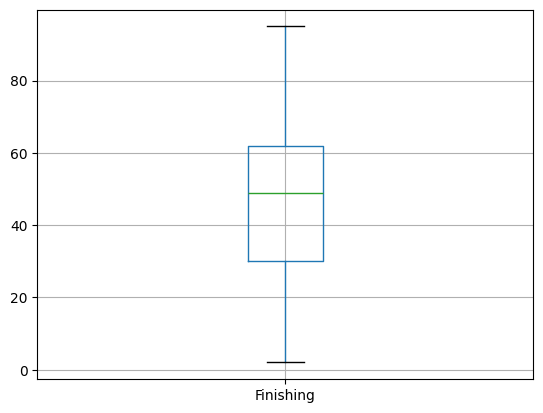

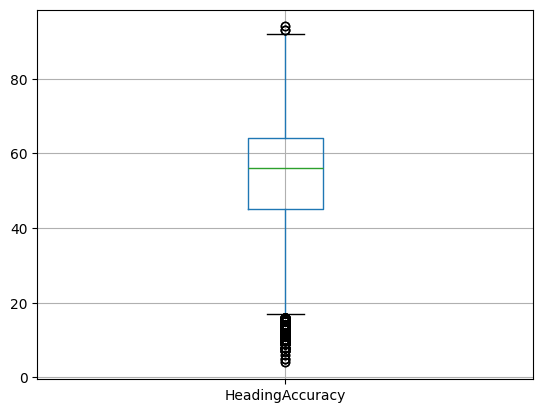

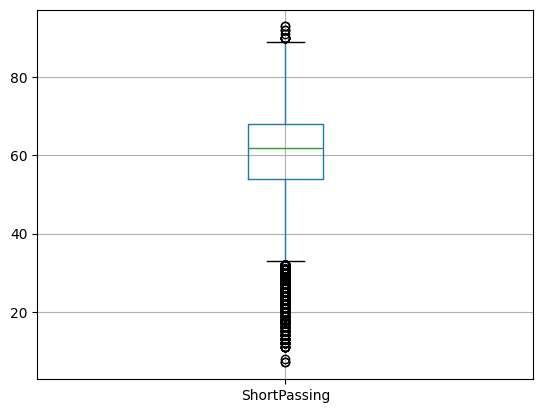

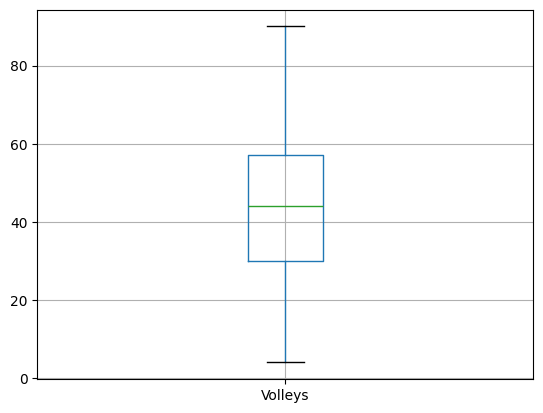

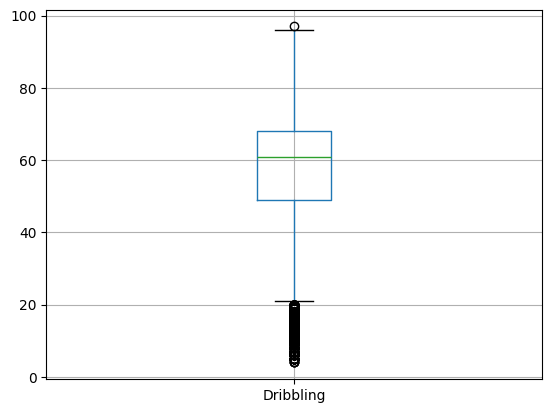

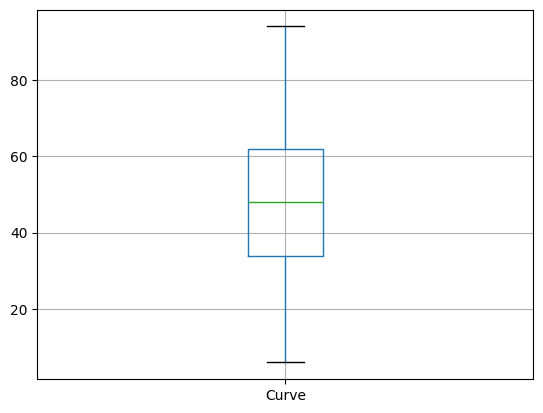

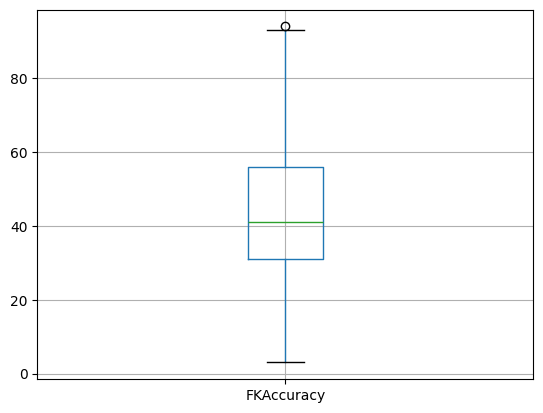

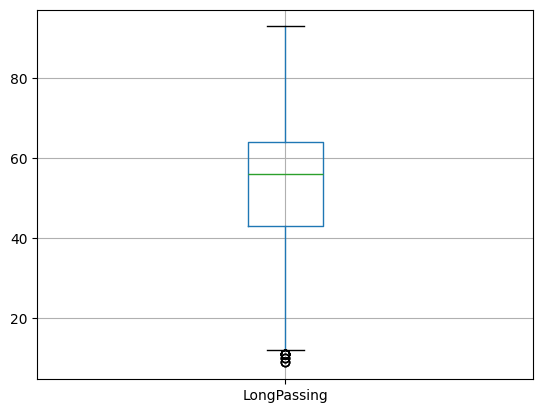

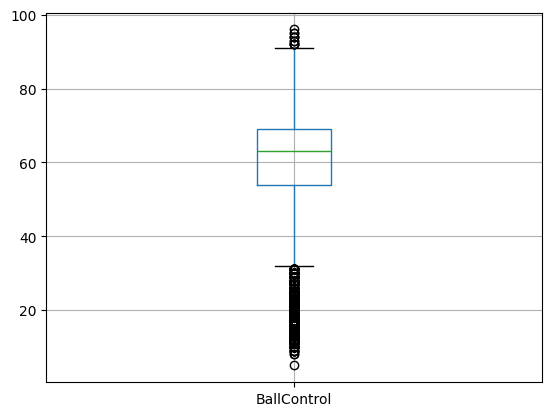

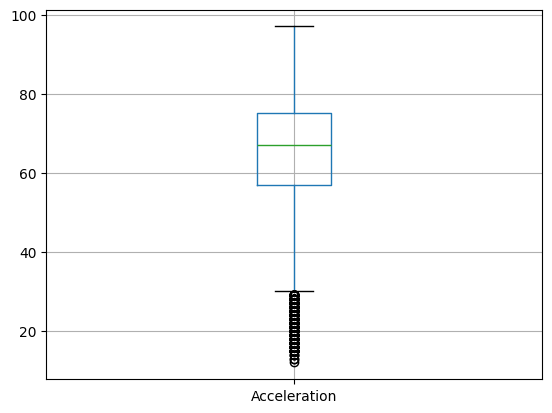

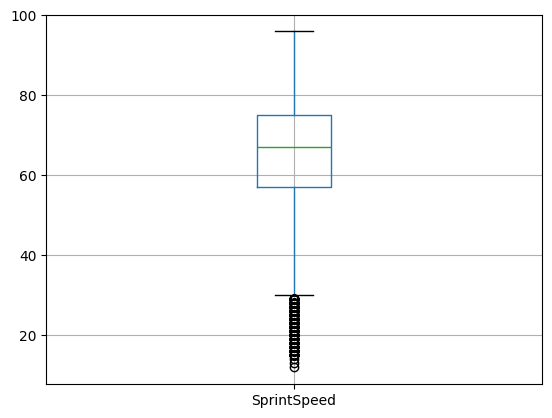

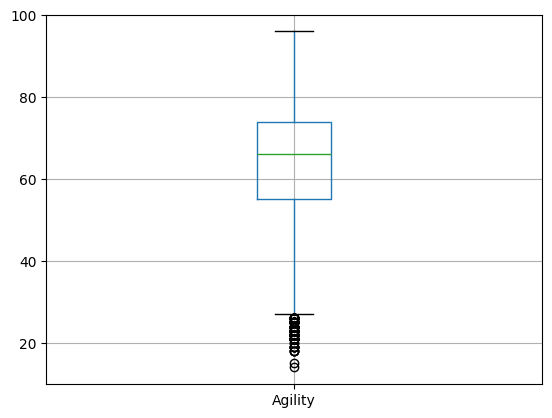

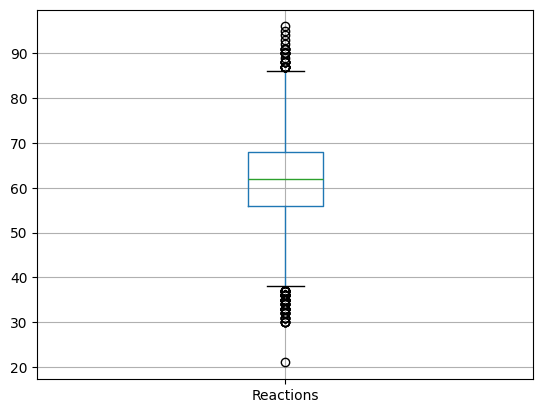

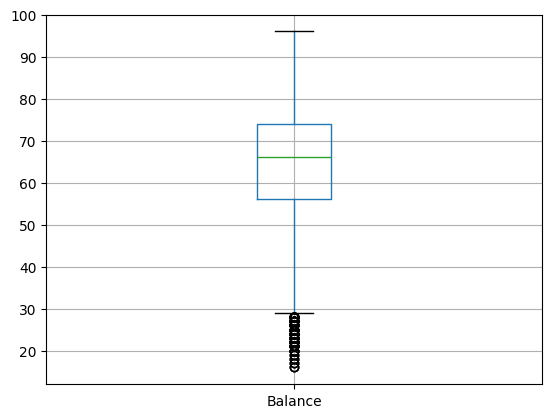

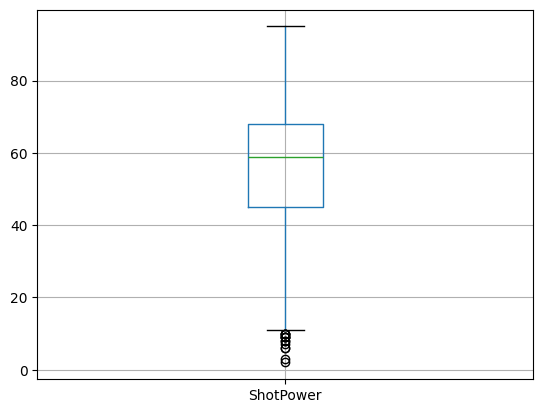

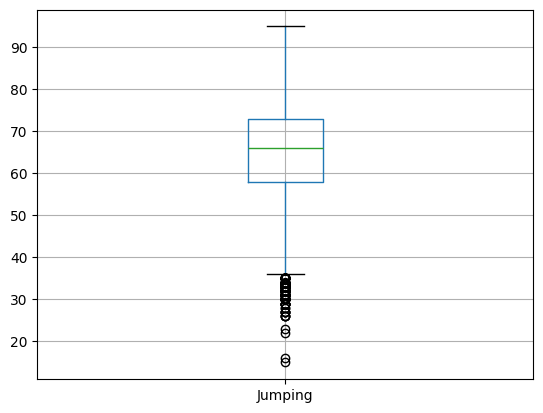

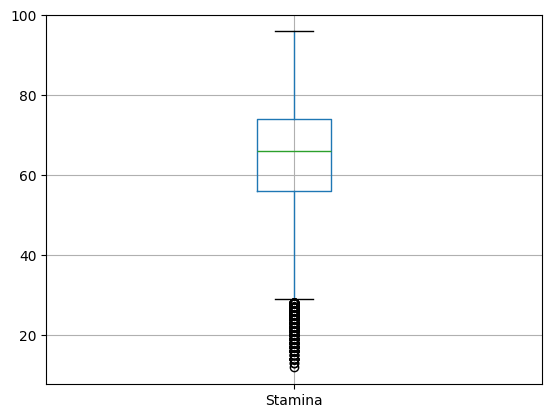

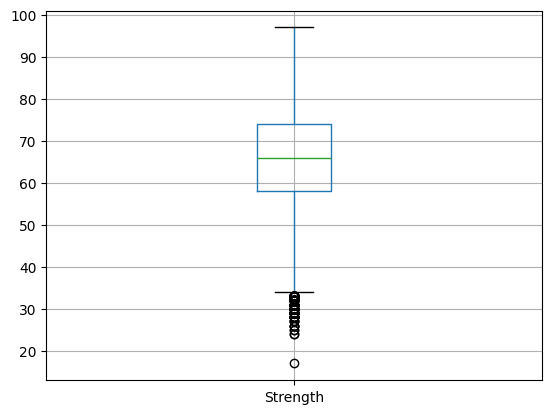

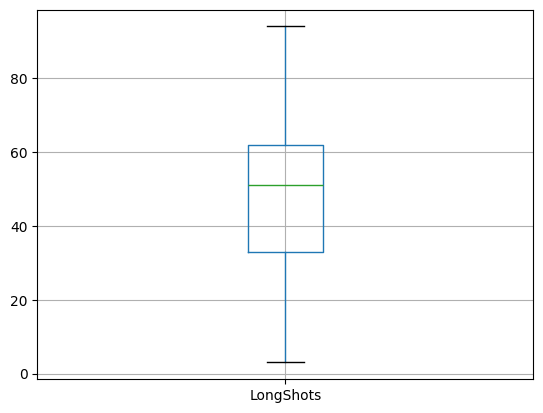

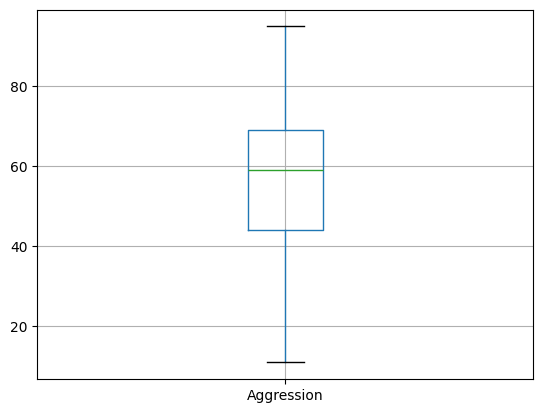

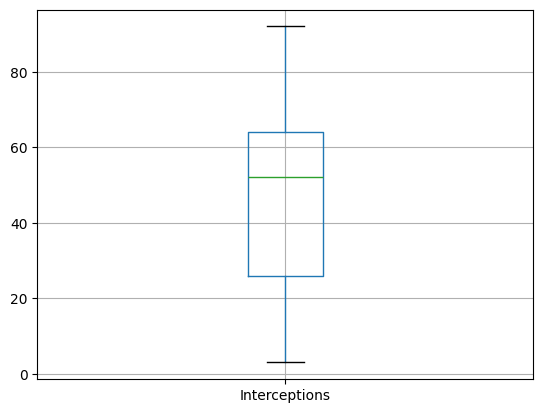

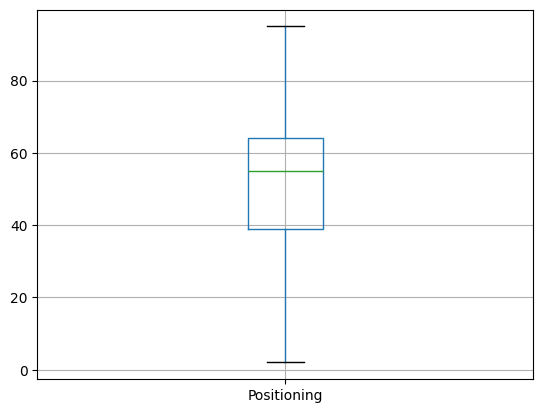

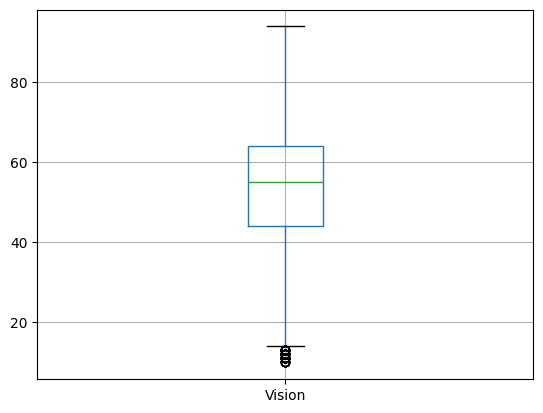

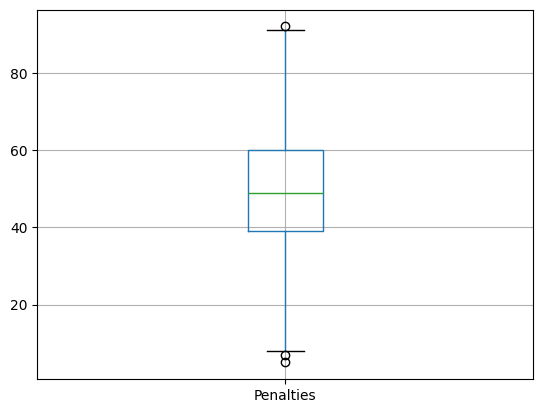

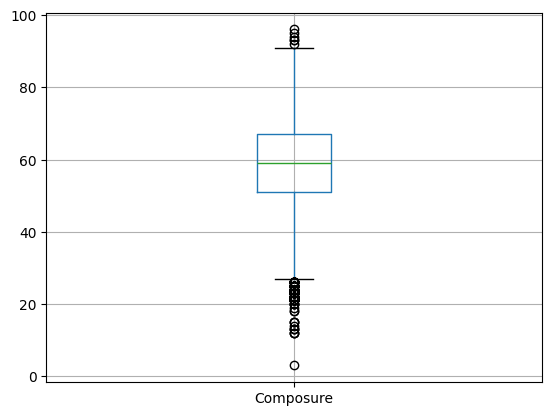

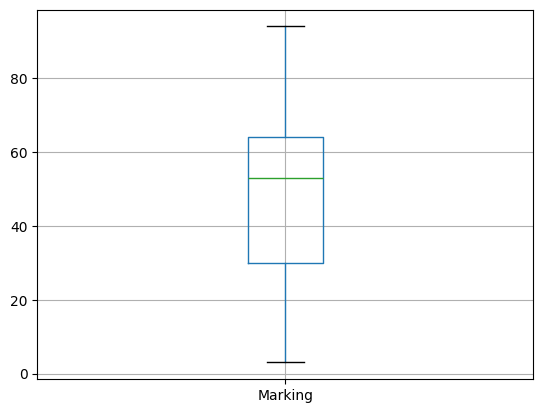

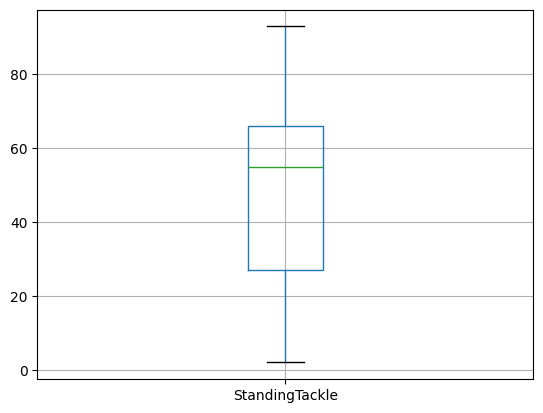

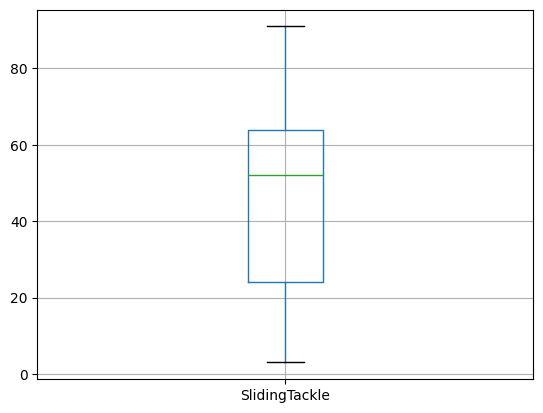

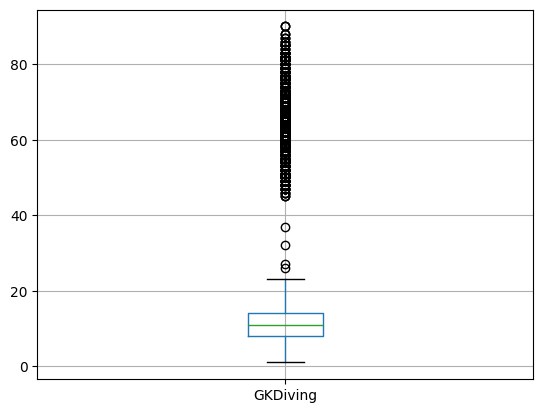

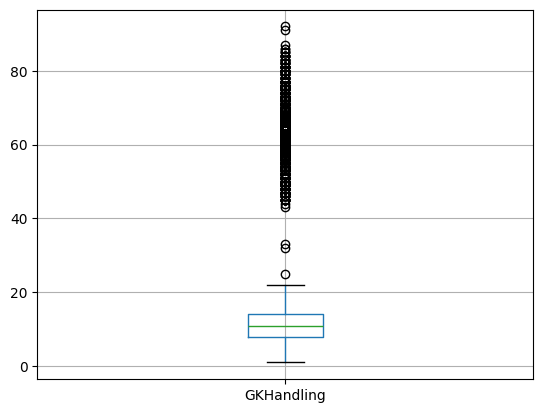

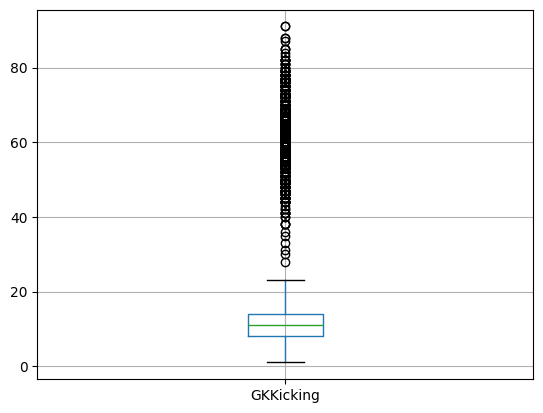

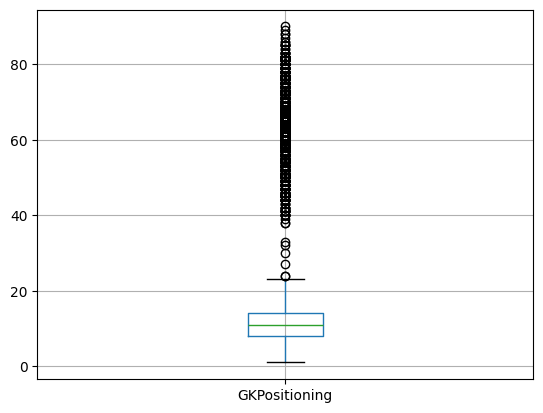

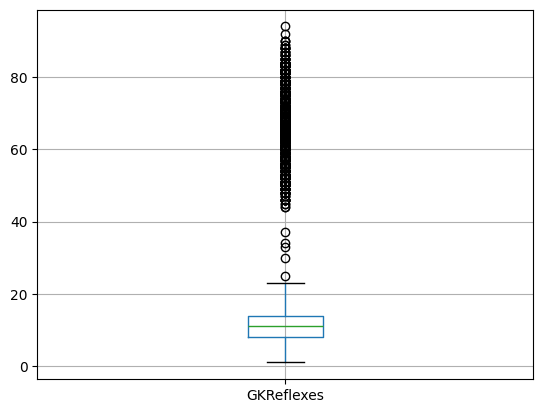

In [8]:
numeric_Col = df.select_dtypes(include=['number']).columns
for col in numeric_Col:
    plt.figure()
    df.boxplot([col])

In [9]:
def remOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return df[(df[col] < upper) & (df[col] > lower)]

In [10]:
print("Old Shape: ", df.shape)

for col in numeric_Col:
    df = remOutliers(df, col)

print("New Shape: ", df.shape)

Old Shape:  (18207, 34)
New Shape:  (12268, 34)


In [12]:
df['Position'].value_counts()

Position
ST     1789
CM     1223
LB     1095
RB     1060
RM      965
LM      939
CDM     791
CAM     791
CB      642
RCM     344
LCM     343
LW      311
LCB     308
RW      291
RCB     277
RDM     219
LDM     204
LS      177
RS      174
RWB      78
LWB      68
CF       65
LAM      19
RAM      17
RF       13
LF       12
Name: count, dtype: int64

In [230]:
scaler = preprocessing.MinMaxScaler()
df[numeric_Col] = scaler.fit_transform(df[numeric_Col])

df.head()

Finishing  HeadingAccuracy  ShortPassing   Volleys  Dribbling  \
RowNumber                                                                  
24          0.276316         0.878378      0.431373  0.441558   0.433962   
27          0.618421         0.783784      0.941176  0.545455   0.641509   
39          0.342105         0.851351      0.843137  0.675325   0.509434   
42          0.513158         0.824324      0.862745  0.766234   0.641509   
49          0.802632         0.702703      0.921569  0.636364   0.849057   

              Curve  FKAccuracy  LongPassing  BallControl  Acceleration  ...  \
RowNumber                                                                ...   
24         0.567568    0.200000     0.525424     0.325581      0.372549  ...   
27         0.554054    0.773333     0.915254     0.813953      0.294118  ...   
39         0.581081    0.640000     0.881356     0.860465      0.509804  ...   
42         0.729730    0.613333     0.762712     0.790698      0.529412  ...   
49         0.837838    0.626667     0.779661     0.953488      0.960784  ...   

           Composure   Marking  StandingTackle  SlidingTackle  GKDiving  \
RowNumber                                                                 
24          0.941176  1.000000        1.000000         1.0000  0.111111   
27          0.941176  0.939759        0.963855         0.9625  0.666667   
39          0.882353  0.939759        0.951807         0.9375  0.444444   
42          0.901961  0.963855        0.951807         0.9500  0.777778   
49          0.843137  0.746988        0.891566         0.9375  0.666667   

           GKHandling  GKKicking  GKPositioning  GKReflexes  Position  
RowNumber                                                              
24           0.111111   0.052632       0.157895    0.105263       LCB  
27           0.722222   0.789474       0.578947    0.578947       CDM  
39           0.611111   0.210526       0.421053    0.473684       RCB  
42           0.500000   0.684211       0.578947    0.736842        CB  
49           0.777778   0.631579       0.263158    0.631579        LB  

[5 rows x 34 columns]

In [231]:
position_mapping = {
    "ST": 0, "CM": 1, "LB": 2, "RB": 3, "RM": 4, "LM": 5, "CDM": 6, "CAM": 7, "CB": 8,
    "RCM": 9, "LCM": 10, "LW": 11, "LCB": 12, "RW": 13, "RCB": 14, "RDM": 15, "LDM": 16,
    "LS": 17, "RS": 18, "RWB": 19, "LWB": 20, "CF": 21, "LAM": 22, "RAM": 23, "RF": 24,
    "LF": 25
}

In [232]:
df = df.dropna(subset=['Position'])
df['Position'] = df['Position'].map(position_mapping)

df.head()

Finishing  HeadingAccuracy  ShortPassing   Volleys  Dribbling  \
RowNumber                                                                  
24          0.276316         0.878378      0.431373  0.441558   0.433962   
27          0.618421         0.783784      0.941176  0.545455   0.641509   
39          0.342105         0.851351      0.843137  0.675325   0.509434   
42          0.513158         0.824324      0.862745  0.766234   0.641509   
49          0.802632         0.702703      0.921569  0.636364   0.849057   

              Curve  FKAccuracy  LongPassing  BallControl  Acceleration  ...  \
RowNumber                                                                ...   
24         0.567568    0.200000     0.525424     0.325581      0.372549  ...   
27         0.554054    0.773333     0.915254     0.813953      0.294118  ...   
39         0.581081    0.640000     0.881356     0.860465      0.509804  ...   
42         0.729730    0.613333     0.762712     0.790698      0.529412  ...   
49         0.837838    0.626667     0.779661     0.953488      0.960784  ...   

           Composure   Marking  StandingTackle  SlidingTackle  GKDiving  \
RowNumber                                                                 
24          0.941176  1.000000        1.000000         1.0000  0.111111   
27          0.941176  0.939759        0.963855         0.9625  0.666667   
39          0.882353  0.939759        0.951807         0.9375  0.444444   
42          0.901961  0.963855        0.951807         0.9500  0.777778   
49          0.843137  0.746988        0.891566         0.9375  0.666667   

           GKHandling  GKKicking  GKPositioning  GKReflexes  Position  
RowNumber                                                              
24           0.111111   0.052632       0.157895    0.105263        12  
27           0.722222   0.789474       0.578947    0.578947         6  
39           0.611111   0.210526       0.421053    0.473684        14  
42           0.500000   0.684211       0.578947    0.736842         8  
49           0.777778   0.631579       0.263158    0.631579         2  

[5 rows x 34 columns]

<Axes: >

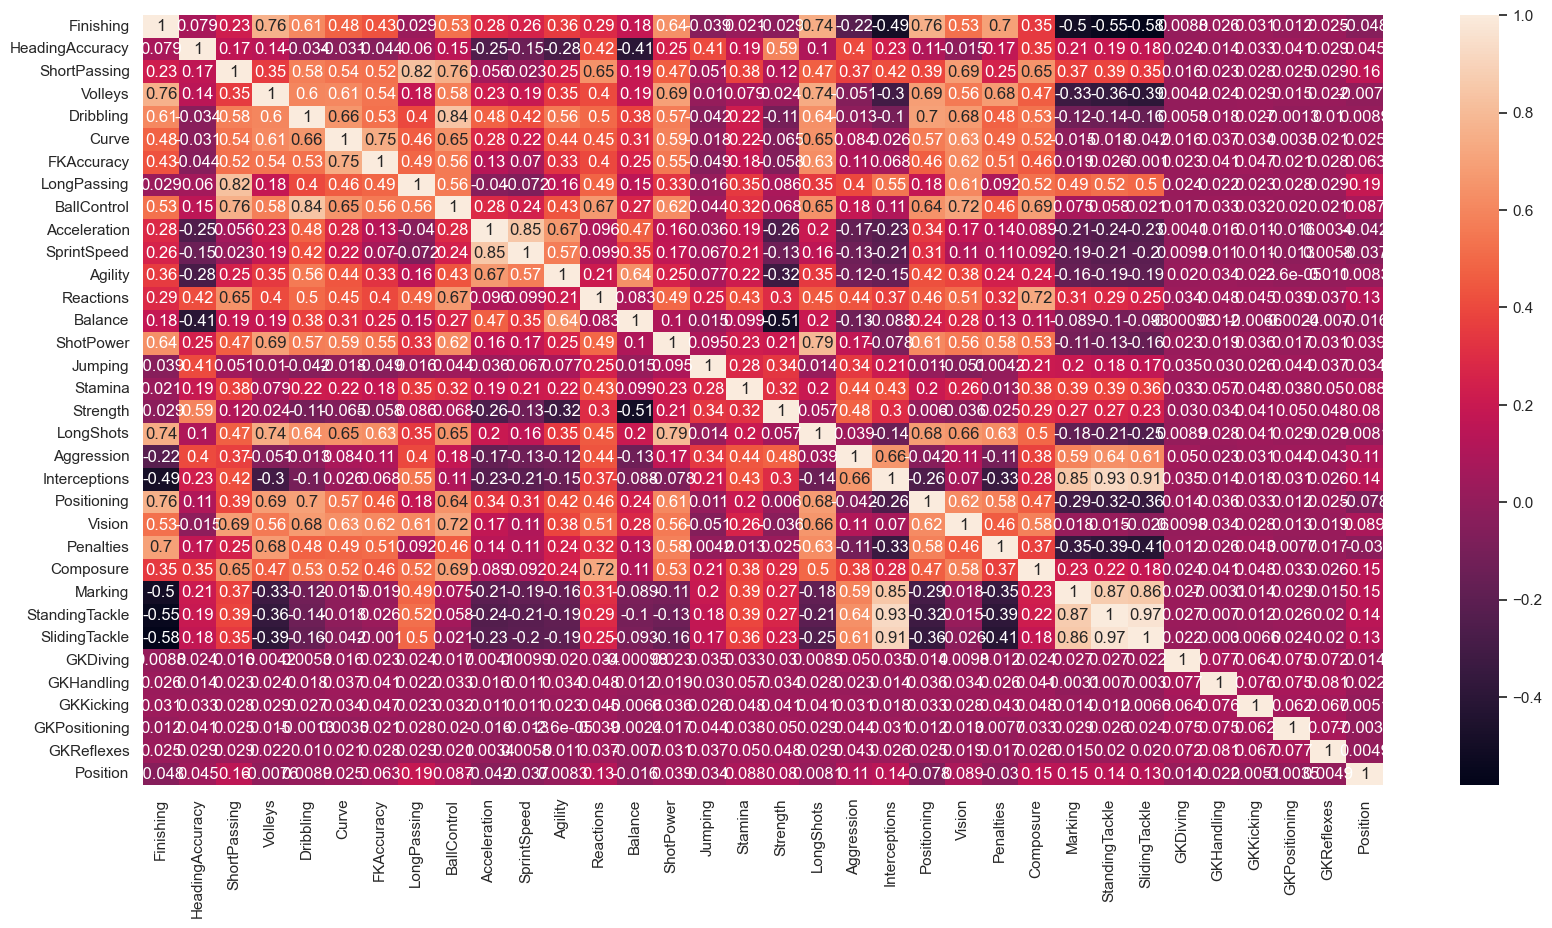

In [233]:
sns.heatmap(df.corr(), annot=True)

In [234]:
num_classes = df['Position'].nunique()

In [235]:
x = df.drop('Position',axis=1)
y = df['Position']

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=104,test_size=0.15, shuffle=True)

In [236]:
model1 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(num_classes, activation='softmax', name='output')
])

In [237]:
model2 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(num_classes, activation='softmax', name='output')
])

In [238]:
model3 = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(32, activation='relu', name='hidden3'),
    Dense(num_classes, activation='softmax', name='output')
])

In [239]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,706 (30.10 KB)

 Trainable params: 7,706 (30.10 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,298 (55.85 KB)

 Trainable params: 14,298 (55.85 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,546 (60.73 KB)

 Trainable params: 15,546 (60.73 KB)

 Non-trainable params: 0 (0.00 B)

In [240]:
def runModels(model, rate, epoch):
    print("Model with Learning Rate: ", rate)
    print("Number of Epochs: ", epoch)
    optimizer =  Adam(learning_rate = rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    h = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.10)
        
    loss = np.array(h.history['loss'])
    val_loss = np.array(h.history['val_loss'])
    epoch_range = range(epoch)
        
    plt.plot(epoch_range, loss, label = 'loss', color = 'blue')
    plt.plot(epoch_range, val_loss, label = 'val_loss', color = 'orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.show()
        
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))
    print("_______________________________________________________________________________________________")
    print("_______________________________________________________________________________________________")

Model with Learning Rate:  0.1
Number of Epochs:  10
Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.2435 - loss: 2.6922 - val_accuracy: 0.3369 - val_loss: 1.9840
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.3381 - loss: 2.0171 - val_accuracy: 0.3301 - val_loss: 1.9673
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.3365 - loss: 2.0108 - val_accuracy: 0.3311 - val_loss: 1.9952
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.3536 - loss: 1.9580 - val_accuracy: 0.3167 - val_loss: 2.0836
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.3504 - loss: 1.9893 - val_accuracy: 0.3513 - val_loss: 2.0250
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.3382 - loss: 2.0419 - val_accuracy: 0.3542 - val_loss: 1.9363
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.3601 - loss: 1.9615 - val_accuracy: 0.3147 - val_loss: 2.0522
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━

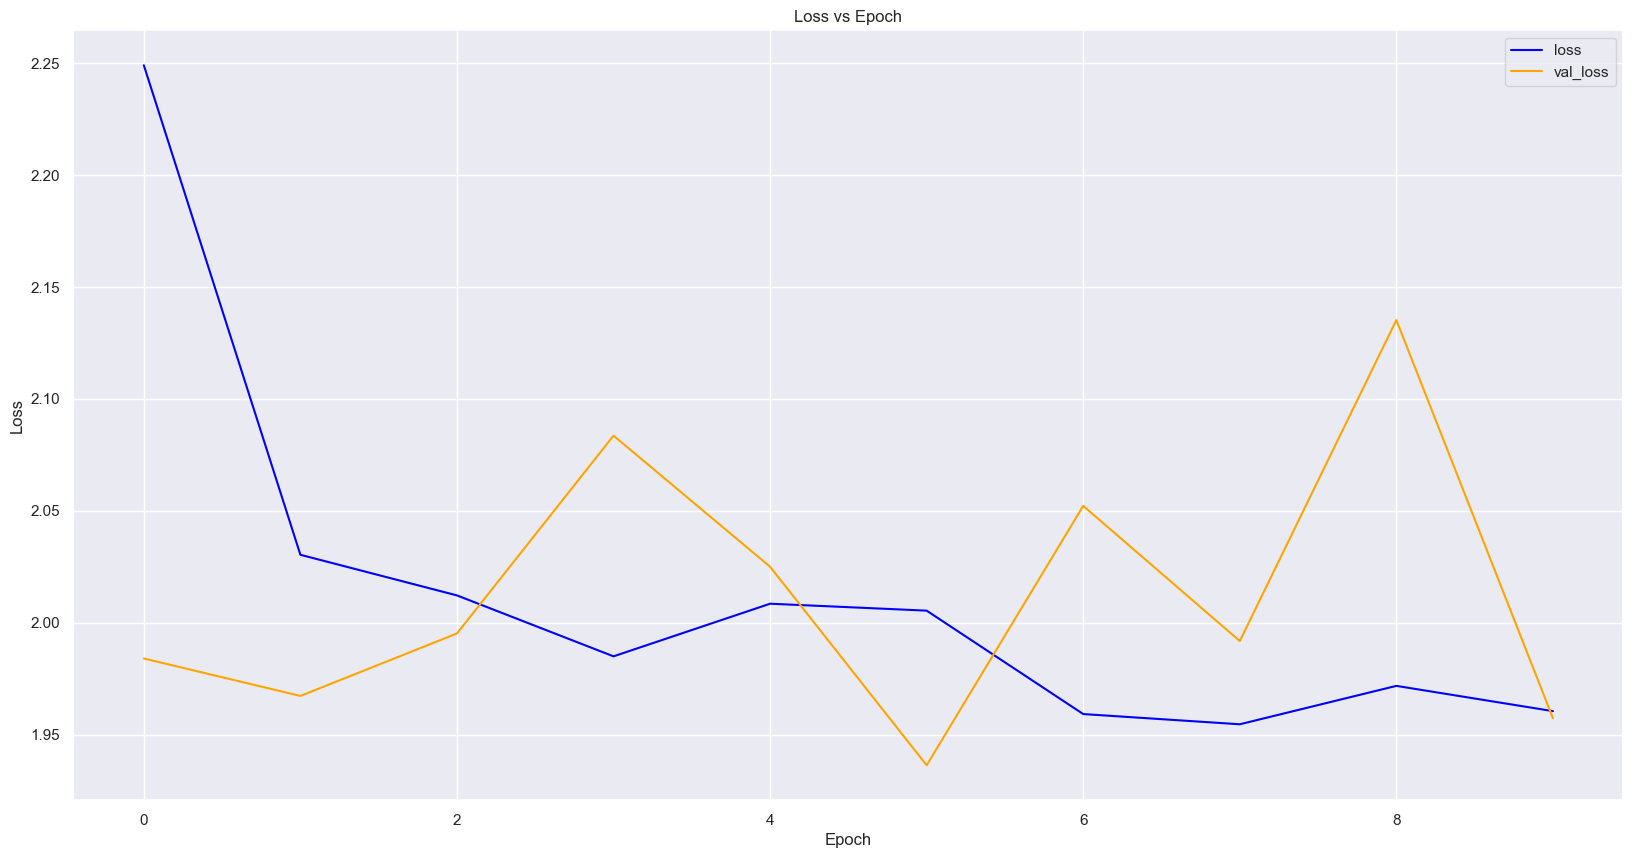

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.3667 - loss: 1.9456
Test Loss: 1.9553070068359375
Test Accuracy: 0.36333879828453064
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
Accuracy: 0.3633
Precision: 0.2412
Recall: 0.3633

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.90      0.71       272
           1       0.38      0.55      0.45       197
           2       0.18      0.02      0.03       161
           3       0.39      0.59      0.47       150
           4       0.00      0.00      0.00       145
           5       0.26      0.04      0.07       140
           6       0.26      0.73      0.38       123
           7       0.20      0.55      0.29       115
           8       0.33      0.65      0.44        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.2373 - loss: 2.7735 - val_accuracy: 0.3436 - val_loss: 2.0007
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.3247 - loss: 2.0722 - val_accuracy: 0.2993 - val_loss: 2.0801
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.3282 - loss: 2.0118 - val_accuracy: 0.3032 - val_loss: 2.0525
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.3324 - loss: 2.0482 - val_accuracy: 0.3244 - val_loss: 1.9550
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.3393 - loss: 2.0128 - val_accuracy: 0.3263 - val_loss: 2.0369
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.3214 - loss: 2.0215 - val_accuracy: 0.3051 - val_loss: 2.0999
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.3297 - loss: 2.0426 - val_accuracy: 0.3292 - val_loss: 2.0257
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.3472 - loss: 2.0012 - val_accurac

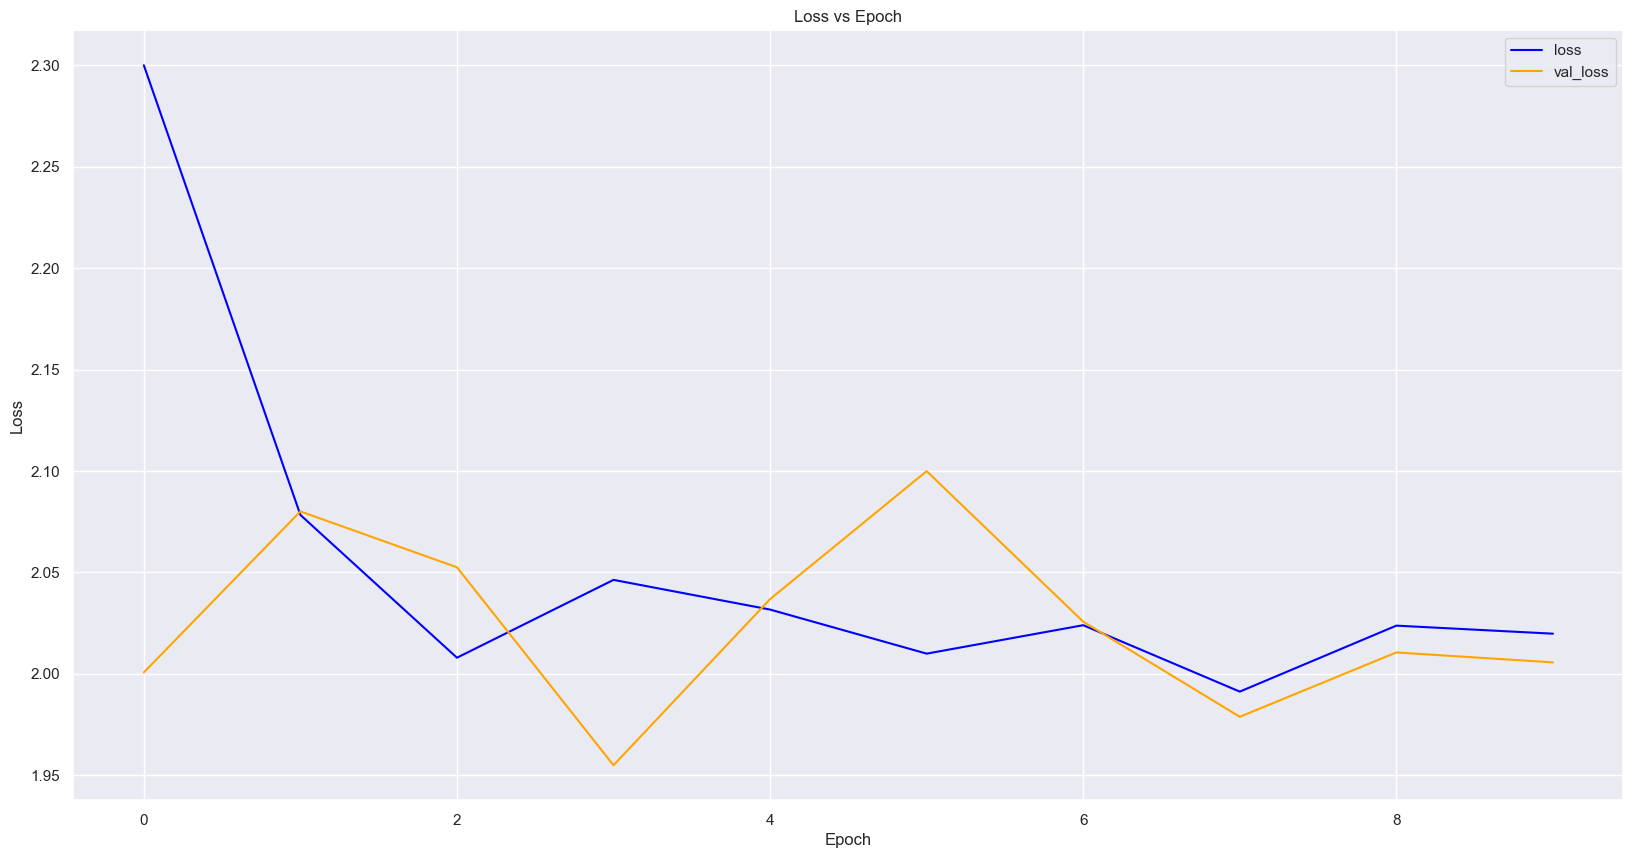

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.3375 - loss: 1.9782
Test Loss: 1.9915118217468262
Test Accuracy: 0.34206220507621765
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Accuracy: 0.3421
Precision: 0.1993
Recall: 0.3421

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73       272
           1       0.31      0.83      0.45       197
           2       0.22      0.73      0.34       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.26      0.14      0.18       140
           6       0.00      0.00      0.00       123
           7       0.23      0.41      0.29       115
           8       0.48      0.24      0.32        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.1317 - loss: 3.1447 - val_accuracy: 0.1530 - val_loss: 2.7837
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.1432 - loss: 2.8186 - val_accuracy: 0.1530 - val_loss: 2.7921
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.1436 - loss: 2.8081 - val_accuracy: 0.1530 - val_loss: 2.7869
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.1472 - loss: 2.8146 - val_accuracy: 0.1530 - val_loss: 2.7861
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.1487 - loss: 2.8116 - val_accuracy: 0.1530 - val_loss: 2.7892
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.1400 - loss: 2.8038 - val_accuracy: 0.1530 - val_loss: 2.8014
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.1417 - loss: 2.8049 - val_accuracy: 0.1530 - val_loss: 2.7884
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.1373 - loss: 2.8178 - val_accurac

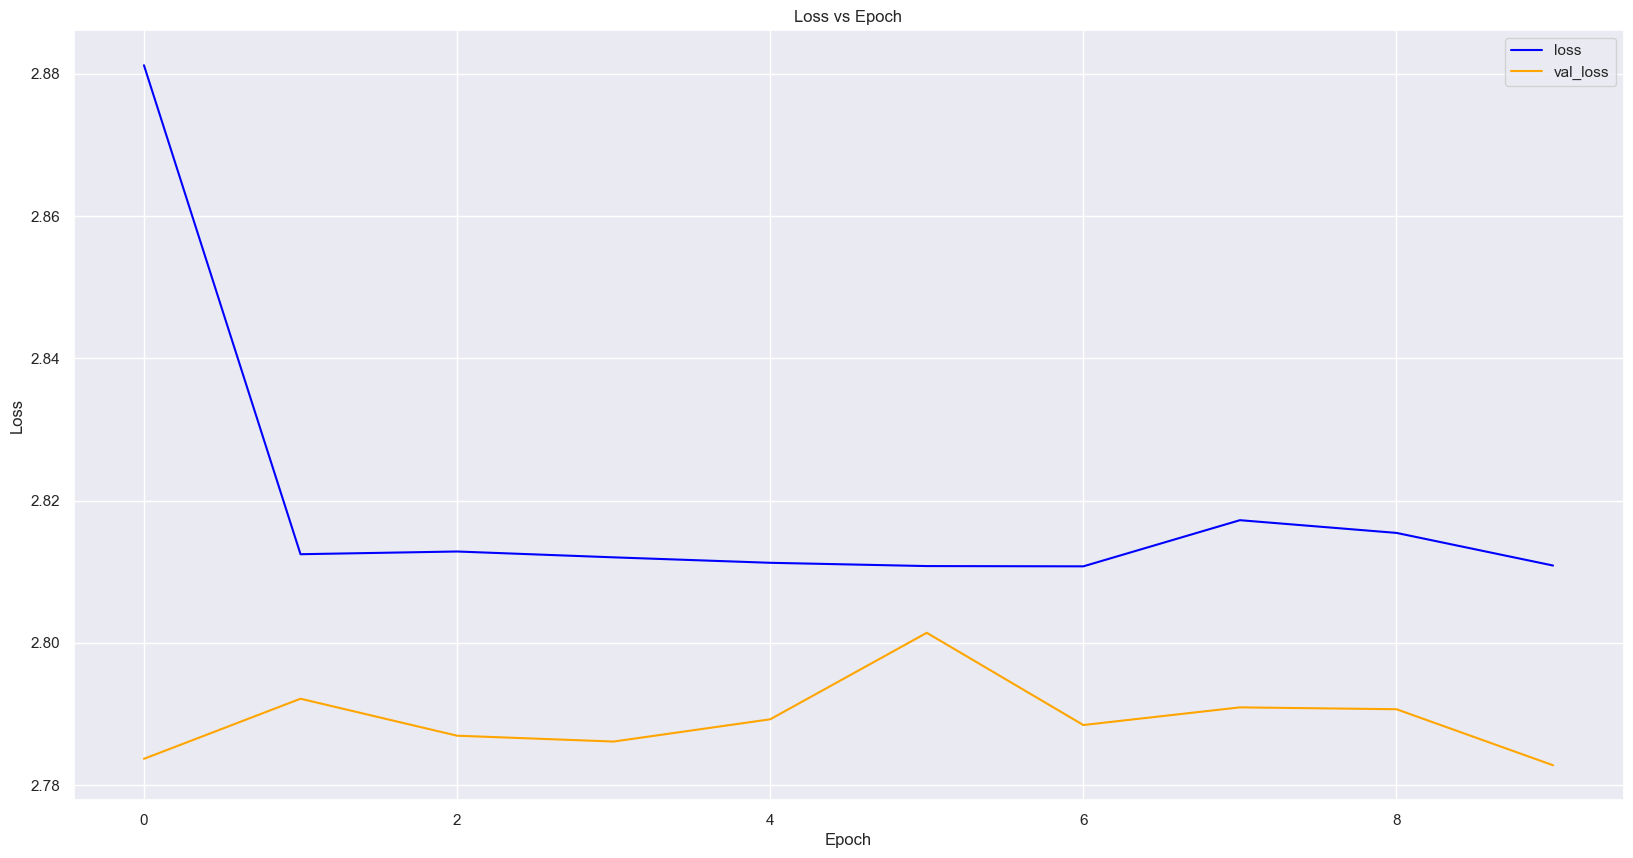

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.1548 - loss: 2.7974
Test Loss: 2.821373462677002
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4025 - loss: 1.8392 - val_accuracy: 0.3734 - val_loss: 1.8357
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.3841 - loss: 1.8299 - val_accuracy: 0.3831 - val_loss: 1.8343
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3975 - loss: 1.8150 - val_accuracy: 0.3811 - val_loss: 1.8393
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.3904 - loss: 1.8172 - val_accuracy: 0.3802 - val_loss: 1.8412
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.3933 - loss: 1.8235 - val_accuracy: 0.3782 - val_loss: 1.8467
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.3962 - loss: 1.8323 - val_accuracy: 0.3763 - val_loss: 1.8633
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.3897 - loss: 1.8158 - val_accuracy: 0.3840 - val_loss: 1.8371
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.3958 - loss: 1.8161 - val_accurac

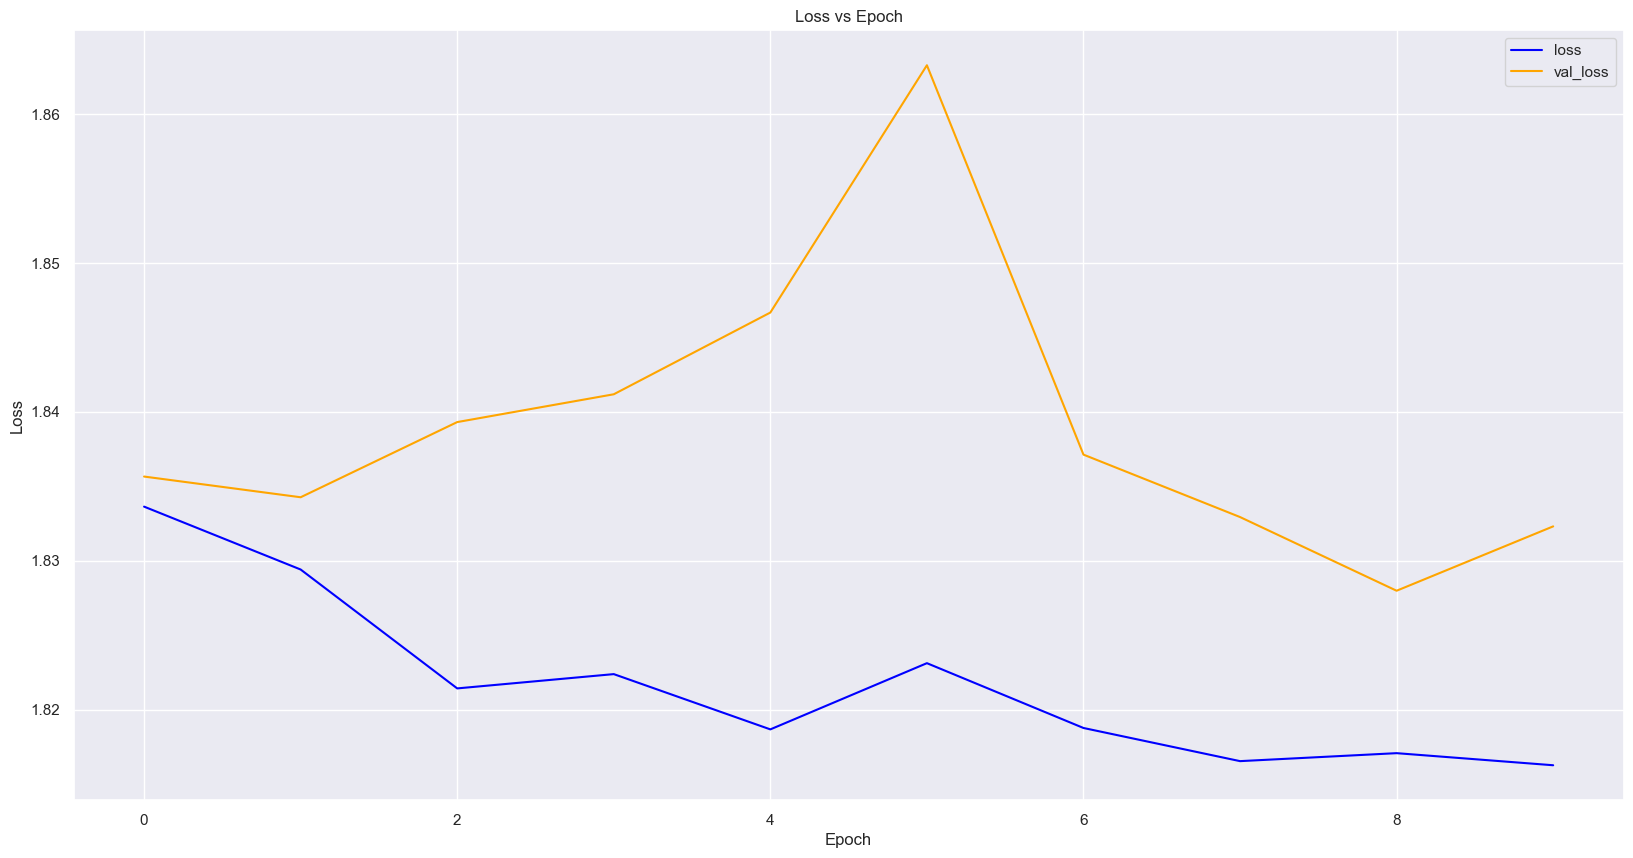

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.3989 - loss: 1.8178
Test Loss: 1.8352627754211426
Test Accuracy: 0.399345338344574
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
Accuracy: 0.3993
Precision: 0.2452
Recall: 0.3993

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.91      0.69       272
           1       0.41      0.65      0.51       197
           2       0.35      0.78      0.49       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.26      0.49      0.34       140
           6       0.31      0.58      0.40       123
           7       0.43      0.34      0.38       115
           8       0.39      0.57      0.46        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.3610 - loss: 1.9222 - val_accuracy: 0.3600 - val_loss: 1.9276
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.3615 - loss: 1.8979 - val_accuracy: 0.3638 - val_loss: 1.9203
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.3646 - loss: 1.8922 - val_accuracy: 0.3494 - val_loss: 1.9217
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3689 - loss: 1.8800 - val_accuracy: 0.3532 - val_loss: 1.9134
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.3639 - loss: 1.8948 - val_accuracy: 0.3407 - val_loss: 1.9107
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.3621 - loss: 1.8810 - val_accuracy: 0.3657 - val_loss: 1.9108
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3658 - loss: 1.8969 - val_accuracy: 0.3474 - val_loss: 1.9106
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3717 - loss: 1.8674 - val_accurac

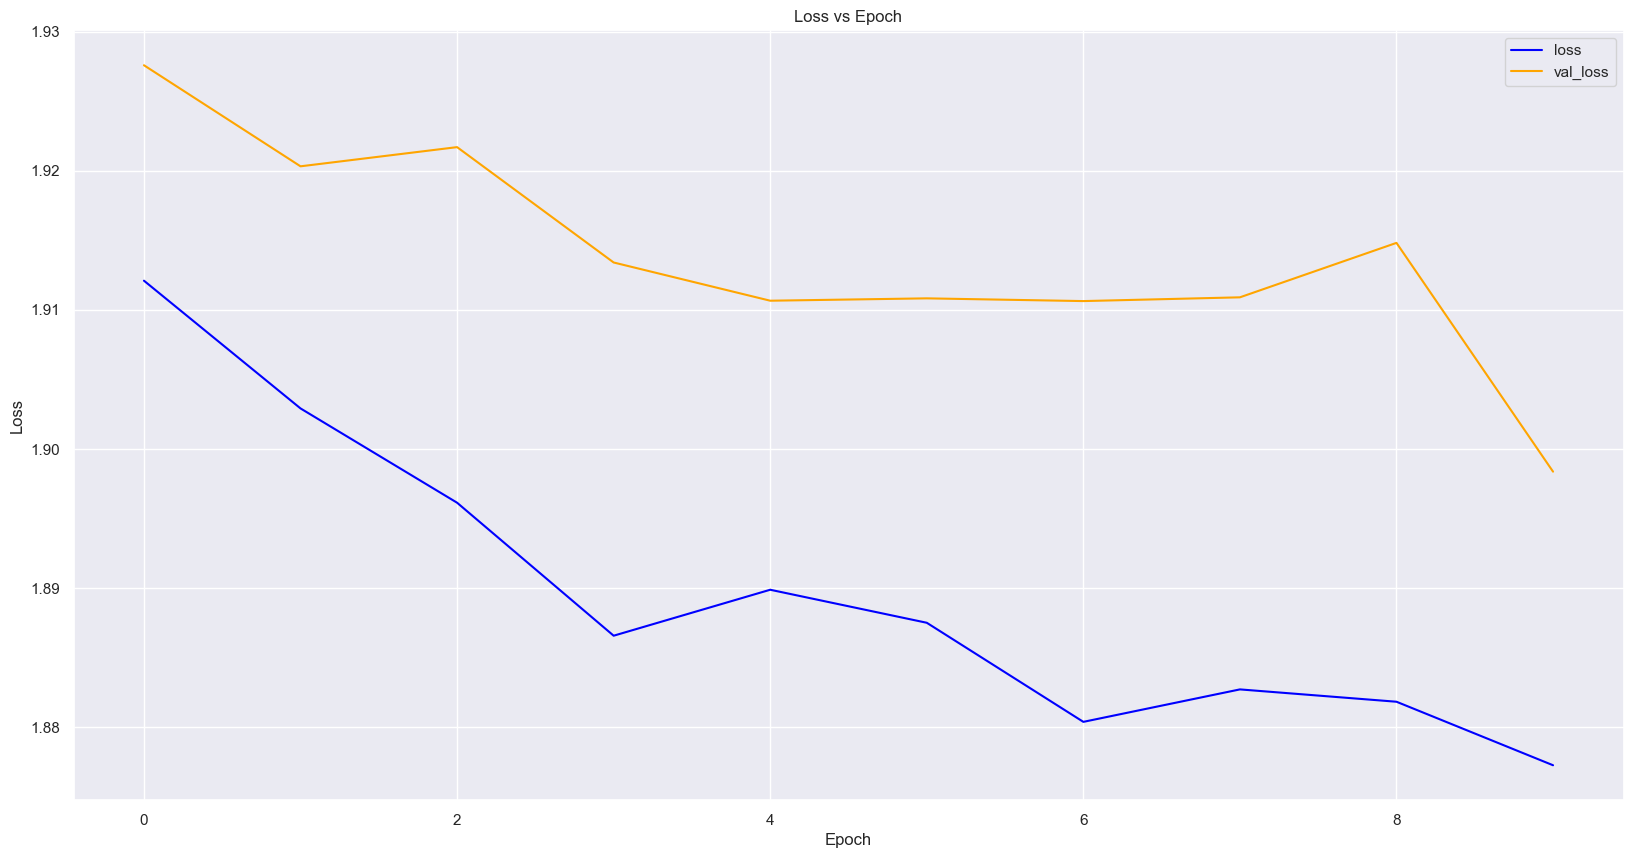

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.3650 - loss: 1.8964
Test Loss: 1.910282850265503
Test Accuracy: 0.36824876070022583
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Accuracy: 0.3682
Precision: 0.2478
Recall: 0.3682

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       272
           1       0.37      0.71      0.49       197
           2       0.22      0.37      0.28       161
           3       0.30      0.28      0.29       150
           4       0.00      0.00      0.00       145
           5       0.26      0.47      0.33       140
           6       0.21      0.23      0.22       123
           7       0.33      0.27      0.30       115
           8       0.38      0.58      0.46        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.1547 - loss: 2.7792 - val_accuracy: 0.1530 - val_loss: 2.7738
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.1485 - loss: 2.7942 - val_accuracy: 0.1530 - val_loss: 2.7762
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.1422 - loss: 2.7967 - val_accuracy: 0.1530 - val_loss: 2.7791
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.1476 - loss: 2.7990 - val_accuracy: 0.1530 - val_loss: 2.7773
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.1477 - loss: 2.7832 - val_accuracy: 0.1530 - val_loss: 2.7736
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.1443 - loss: 2.8059 - val_accuracy: 0.1530 - val_loss: 2.7753
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.1447 - loss: 2.7948 - val_accuracy: 0.1530 - val_loss: 2.7773
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.1500 - loss: 2.7965 - val_accurac

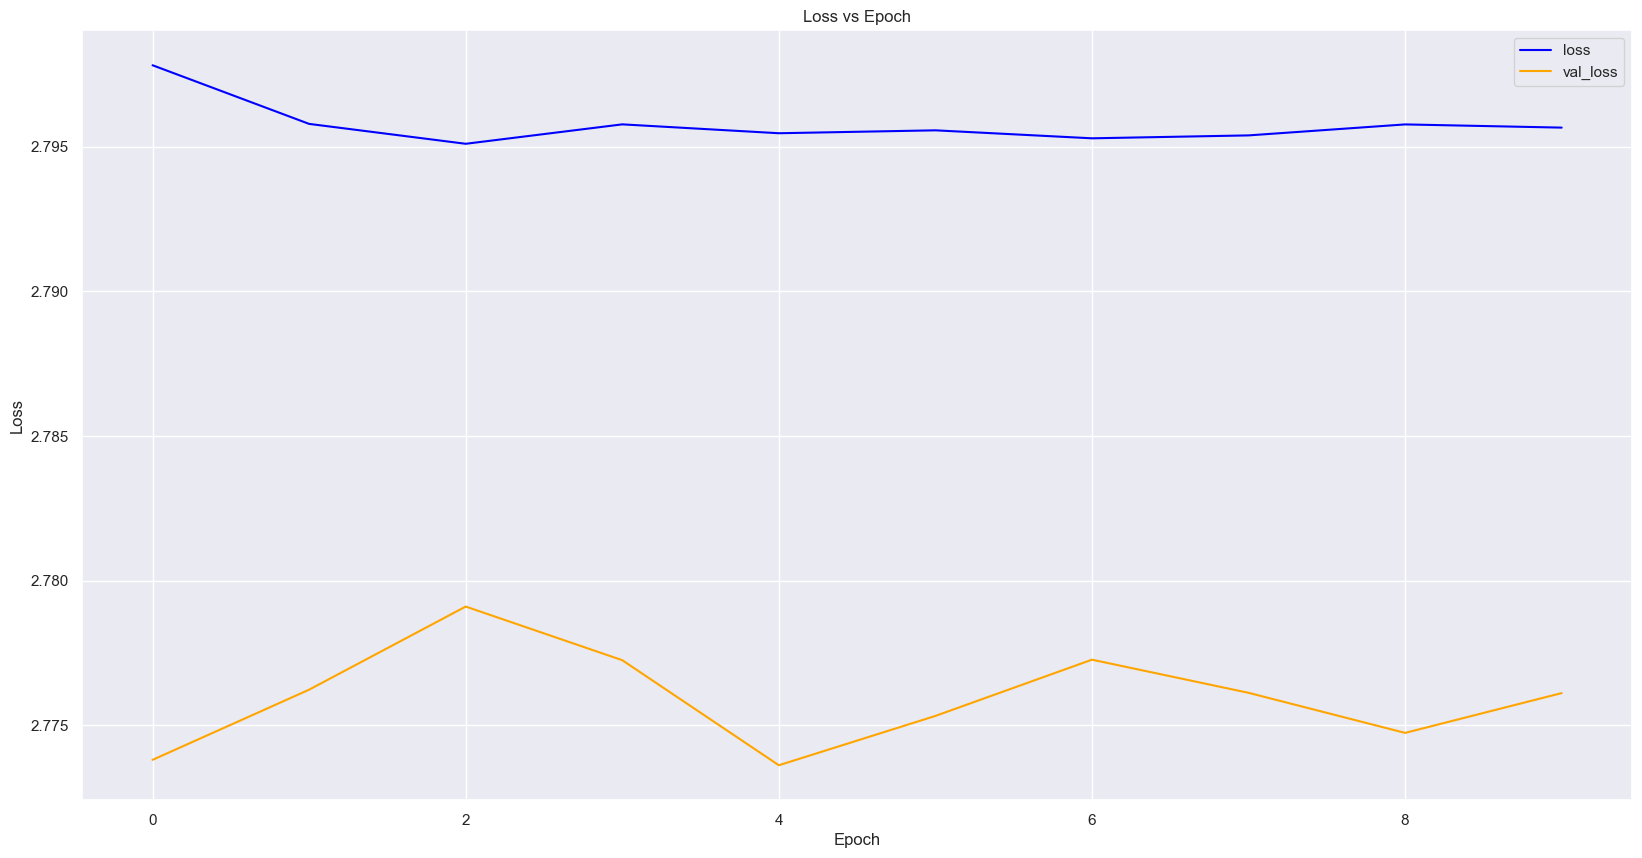

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.1548 - loss: 2.7978
Test Loss: 2.8133199214935303
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.3999 - loss: 1.8012 - val_accuracy: 0.3754 - val_loss: 1.8288
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.4059 - loss: 1.8077 - val_accuracy: 0.3725 - val_loss: 1.8281
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.3958 - loss: 1.8099 - val_accuracy: 0.3782 - val_loss: 1.8293
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.3931 - loss: 1.7956 - val_accuracy: 0.3850 - val_loss: 1.8298
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.3989 - loss: 1.7909 - val_accuracy: 0.3763 - val_loss: 1.8306
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.3967 - loss: 1.8127 - val_accuracy: 0.3782 - val_loss: 1.8310
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.3992 - loss: 1.7895 - val_accuracy: 0.3725 - val_loss: 1.8303
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.3936 - loss: 1.8053 - val_accurac

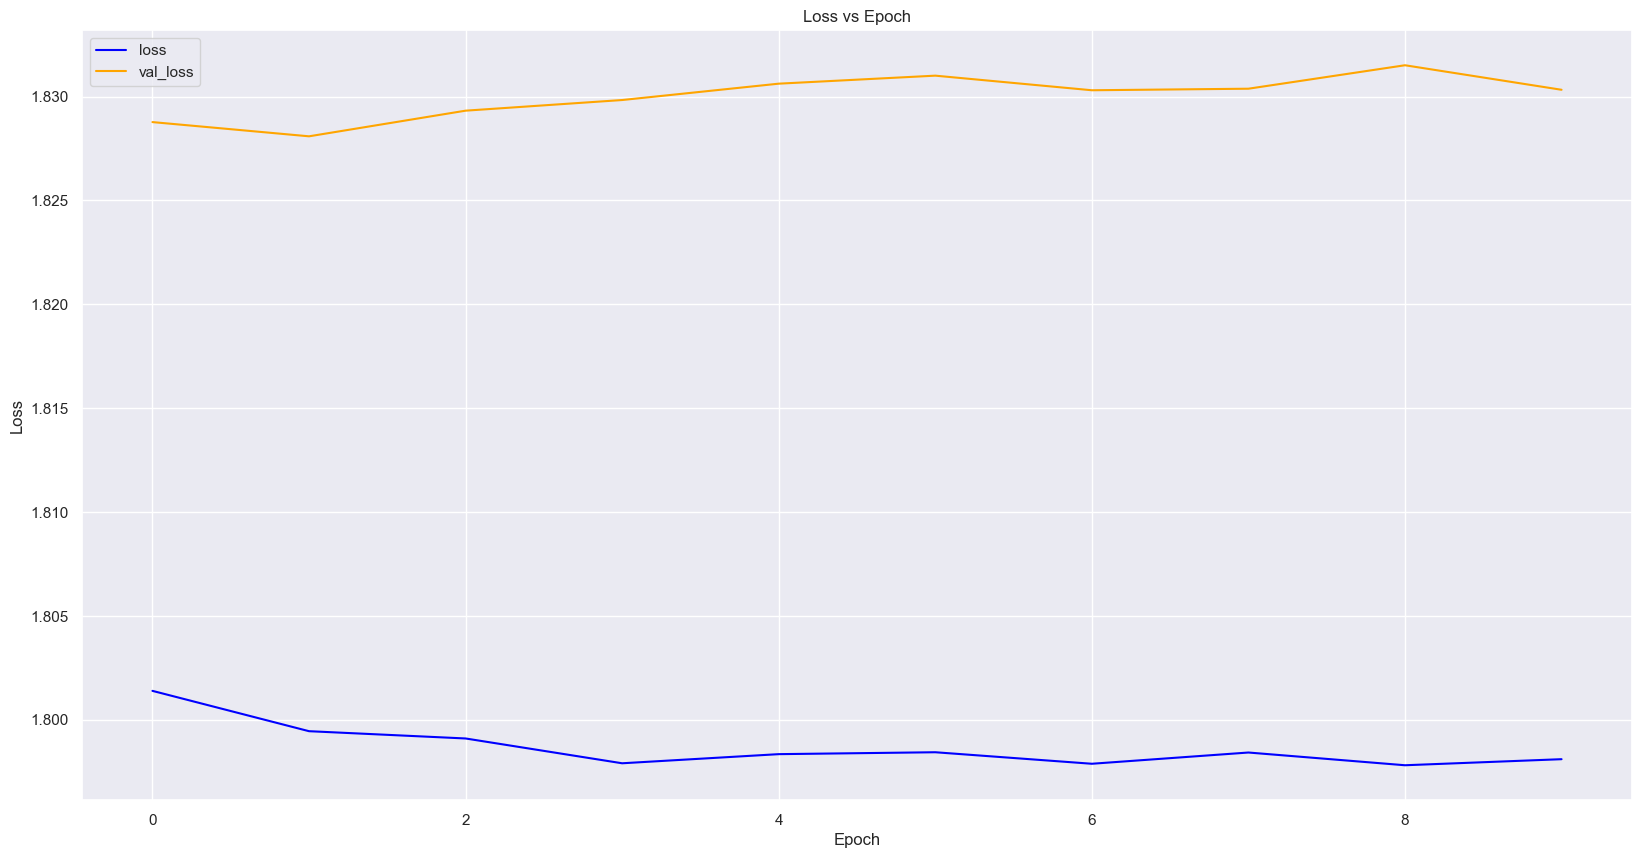

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.3956 - loss: 1.8086
Test Loss: 1.824985384941101
Test Accuracy: 0.3922531306743622
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
Accuracy: 0.3923
Precision: 0.2645
Recall: 0.3923

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69       272
           1       0.38      0.69      0.49       197
           2       0.35      0.68      0.46       161
           3       0.35      0.04      0.07       150
           4       0.26      0.37      0.31       145
           5       0.00      0.00      0.00       140
           6       0.32      0.50      0.39       123
           7       0.31      0.44      0.37       115
           8       0.40      0.55      0.46        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.3704 - loss: 1.8733 - val_accuracy: 0.3686 - val_loss: 1.8966
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.3643 - loss: 1.8811 - val_accuracy: 0.3590 - val_loss: 1.8954
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.3692 - loss: 1.8590 - val_accuracy: 0.3590 - val_loss: 1.8959
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.3748 - loss: 1.8670 - val_accuracy: 0.3667 - val_loss: 1.8976
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.3743 - loss: 1.8510 - val_accuracy: 0.3609 - val_loss: 1.8943
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.3651 - loss: 1.8733 - val_accuracy: 0.3609 - val_loss: 1.8940
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.3700 - loss: 1.8626 - val_accuracy: 0.3657 - val_loss: 1.8978
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.3633 - loss: 1.8640 - val_accurac

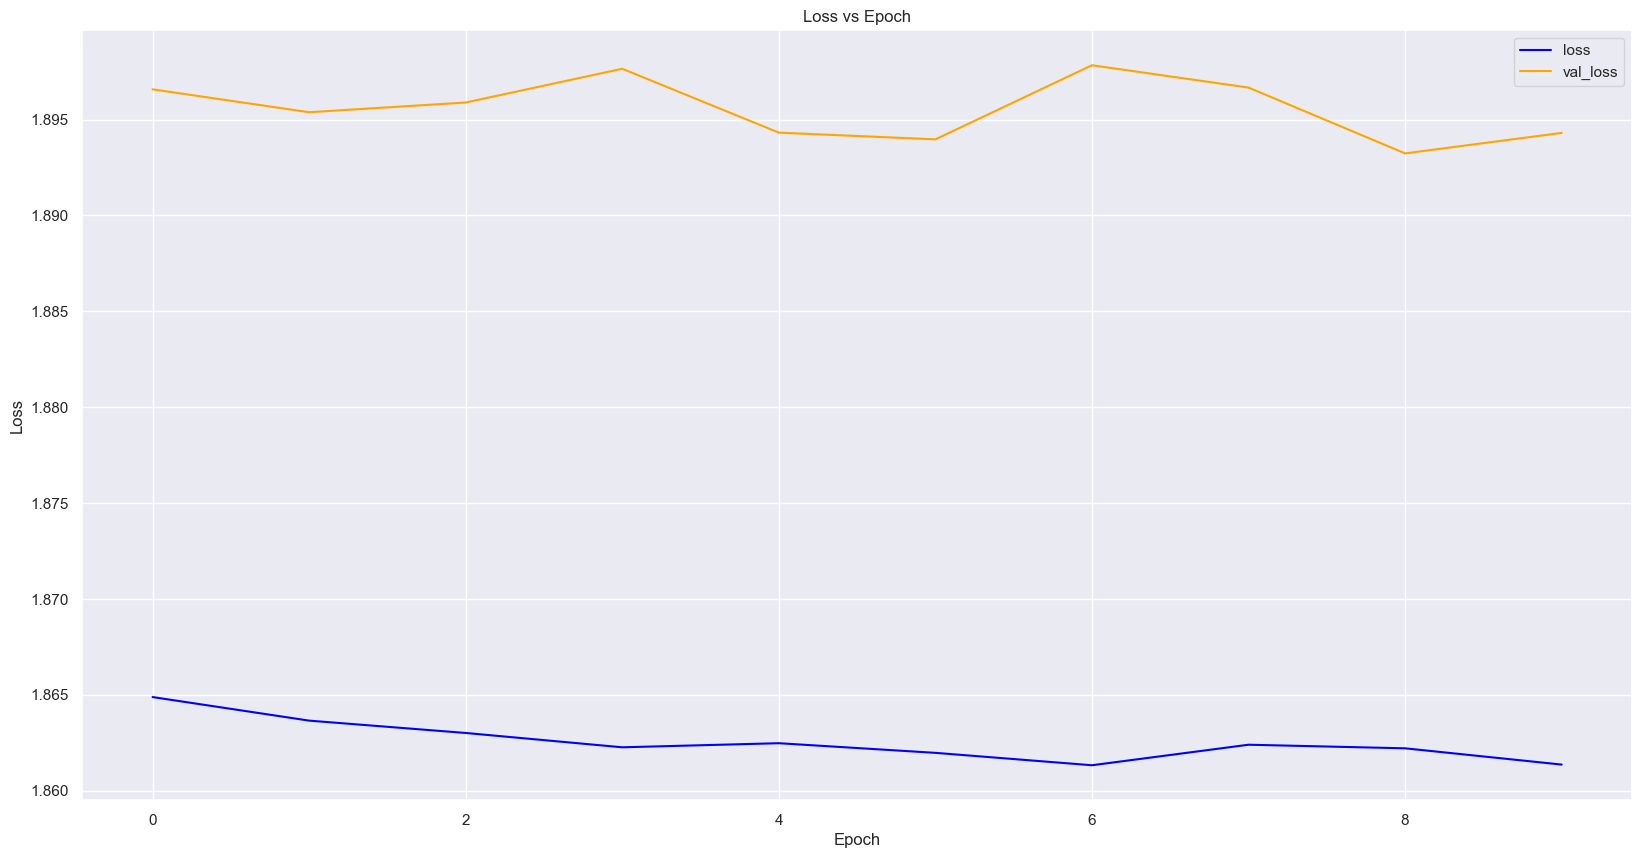

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3635 - loss: 1.8829
Test Loss: 1.8984993696212769
Test Accuracy: 0.3649754524230957
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
Accuracy: 0.3650
Precision: 0.2429
Recall: 0.3650

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       272
           1       0.35      0.75      0.48       197
           2       0.22      0.27      0.24       161
           3       0.29      0.39      0.33       150
           4       0.22      0.34      0.27       145
           5       0.00      0.00      0.00       140
           6       0.22      0.20      0.21       123
           7       0.29      0.35      0.32       115
           8       0.41      0.54      0.47        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.1419 - loss: 2.7949 - val_accuracy: 0.1530 - val_loss: 2.7754
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.1498 - loss: 2.7925 - val_accuracy: 0.1530 - val_loss: 2.7752
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.1461 - loss: 2.7934 - val_accuracy: 0.1530 - val_loss: 2.7751
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.1487 - loss: 2.7929 - val_accuracy: 0.1530 - val_loss: 2.7750
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.1438 - loss: 2.7978 - val_accuracy: 0.1530 - val_loss: 2.7750
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.1426 - loss: 2.7995 - val_accuracy: 0.1530 - val_loss: 2.7749
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.1410 - loss: 2.7916 - val_accuracy: 0.1530 - val_loss: 2.7750
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.1488 - loss: 2.7911 - val_accurac

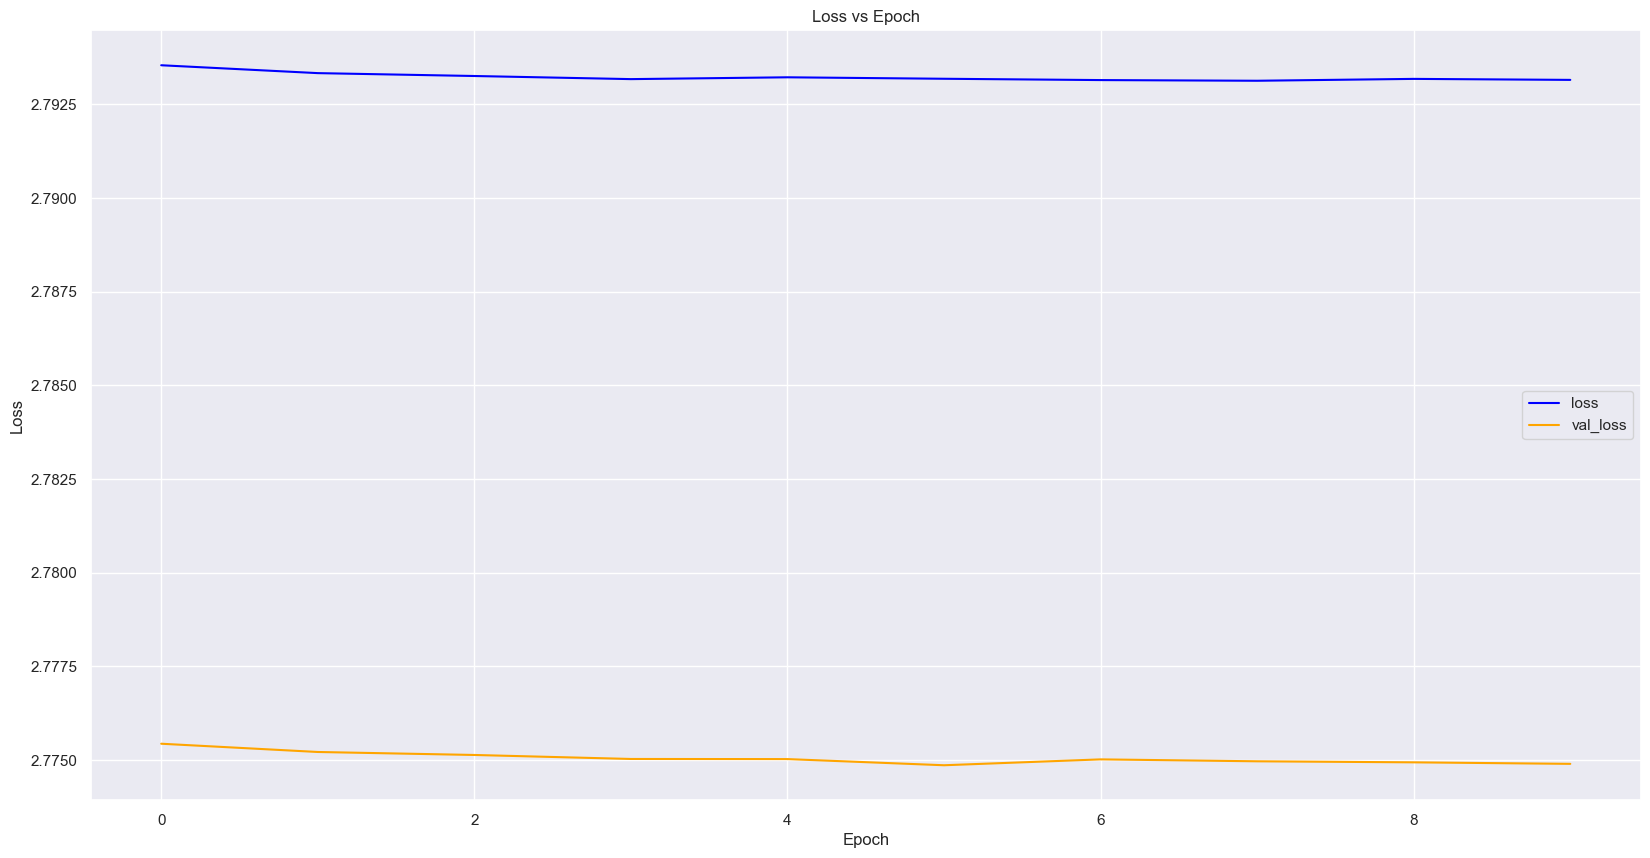

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.1548 - loss: 2.7979
Test Loss: 2.8132824897766113
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.3646 - loss: 2.0102 - val_accuracy: 0.3648 - val_loss: 1.9420
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.3559 - loss: 1.9571 - val_accuracy: 0.3580 - val_loss: 2.0333
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.3462 - loss: 1.9819 - val_accuracy: 0.3542 - val_loss: 1.9426
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.3740 - loss: 1.9346 - val_accuracy: 0.3138 - val_loss: 1.9915
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.3551 - loss: 1.9614 - val_accuracy: 0.3619 - val_loss: 1.9656
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.3492 - loss: 1.9979 - val_accuracy: 0.3754 - val_loss: 1.9559
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.3592 - loss: 1.9889 - val_accuracy: 0.3677 - val_loss: 1.9297
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.3616 - loss: 1.9601 - val_accurac

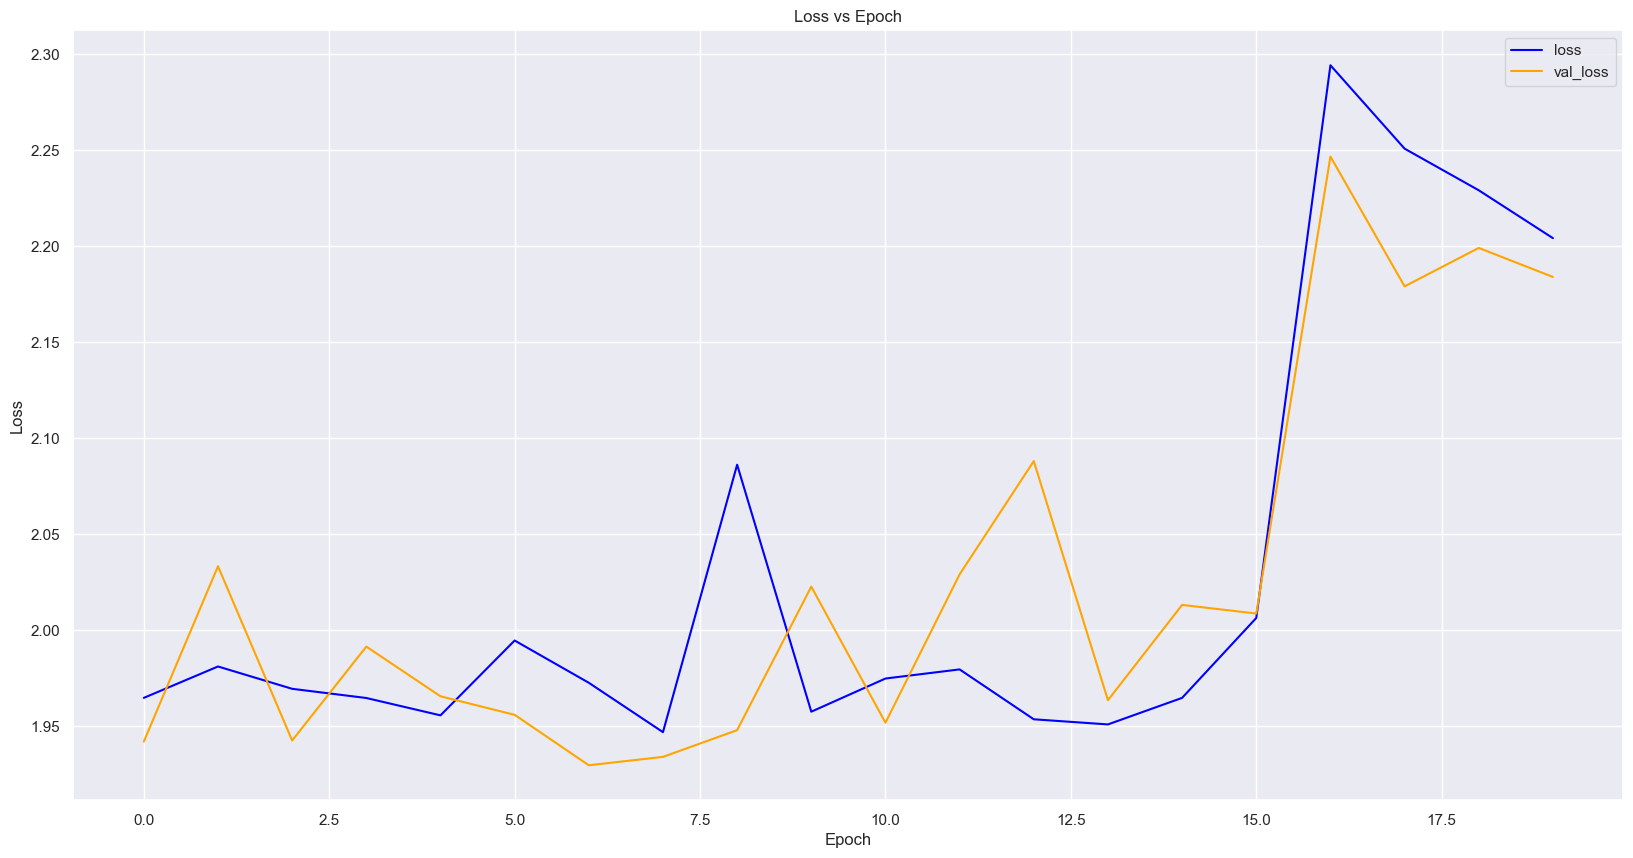

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.2768 - loss: 2.1776
Test Loss: 2.219247817993164
Test Accuracy: 0.2755046486854553
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Accuracy: 0.2755
Precision: 0.1568
Recall: 0.2755

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       272
           1       0.34      0.26      0.30       197
           2       0.18      0.91      0.30       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.18      0.69      0.29       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.3366 - loss: 2.0468 - val_accuracy: 0.3551 - val_loss: 1.9765
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.3322 - loss: 2.0080 - val_accuracy: 0.3138 - val_loss: 2.0072
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.3292 - loss: 2.0256 - val_accuracy: 0.3311 - val_loss: 2.0362
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3271 - loss: 2.0304 - val_accuracy: 0.3205 - val_loss: 2.0153
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.3234 - loss: 2.0721 - val_accuracy: 0.3244 - val_loss: 1.9789
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.3359 - loss: 2.0172 - val_accuracy: 0.3397 - val_loss: 2.0057
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.3272 - loss: 2.0054 - val_accuracy: 0.3138 - val_loss: 2.0728
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.3417 - loss: 1.9884 - val_accurac

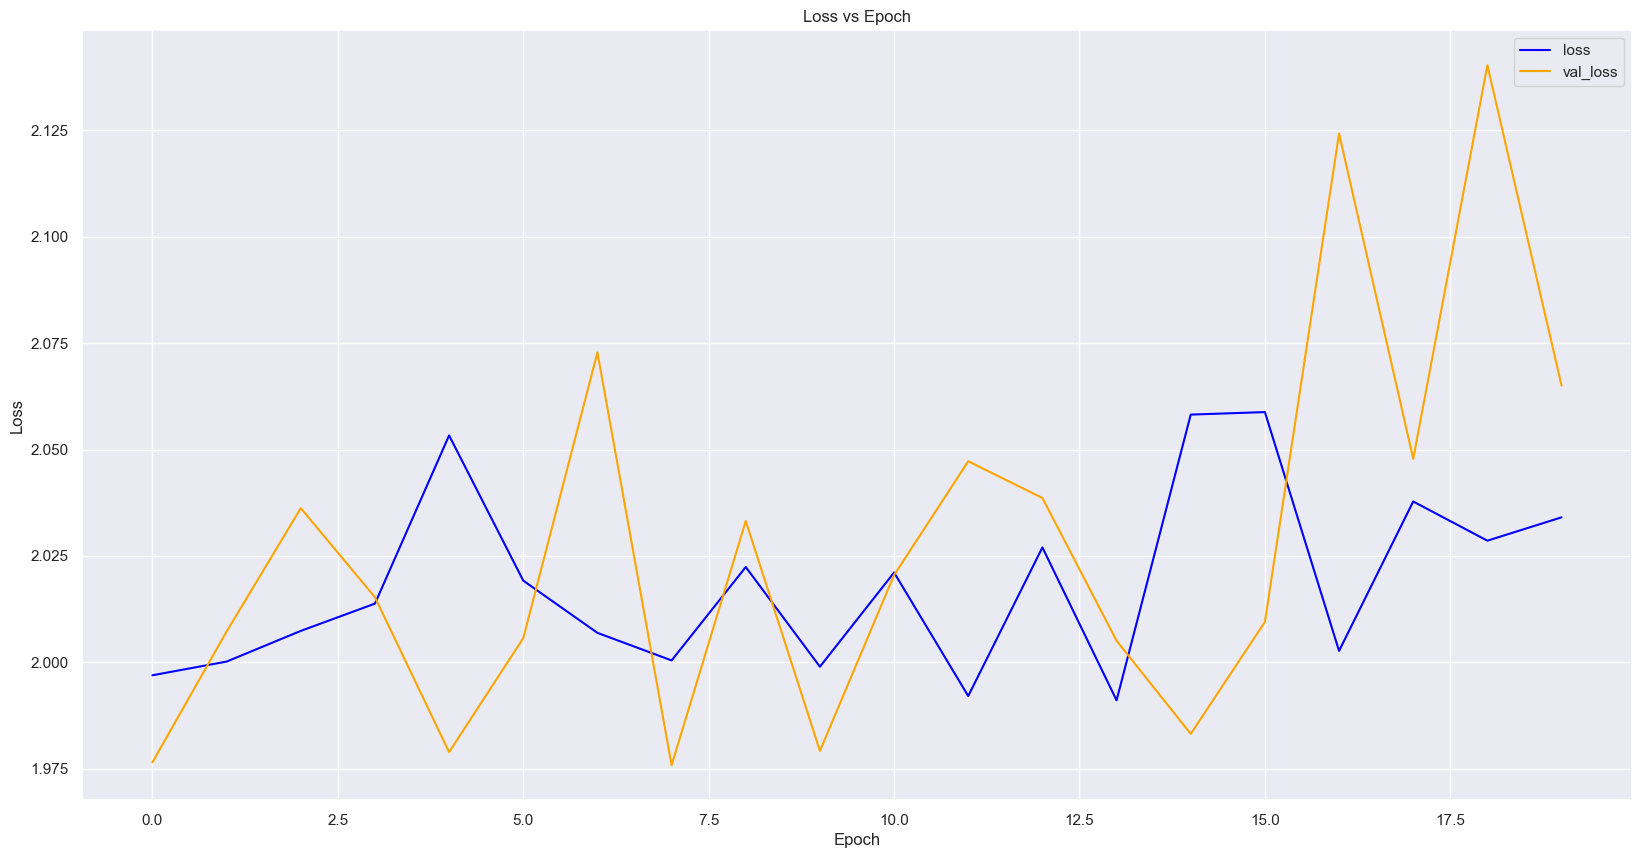

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.3242 - loss: 2.0756
Test Loss: 2.1020491123199463
Test Accuracy: 0.326241135597229
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
Accuracy: 0.3262
Precision: 0.2050
Recall: 0.3262

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.97      0.64       272
           1       0.35      0.55      0.42       197
           2       0.18      0.63      0.29       161
           3       0.30      0.21      0.24       150
           4       0.22      0.18      0.20       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.33      0.14      0.20       115
           8       0.34      0.54      0.42        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.1326 - loss: 2.8149 - val_accuracy: 0.1530 - val_loss: 2.7960
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.1388 - loss: 2.8221 - val_accuracy: 0.1530 - val_loss: 2.7840
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.1474 - loss: 2.7962 - val_accuracy: 0.1530 - val_loss: 2.7898
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.1347 - loss: 2.8048 - val_accuracy: 0.1530 - val_loss: 2.7908
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.1341 - loss: 2.8232 - val_accuracy: 0.1530 - val_loss: 2.7979
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.1421 - loss: 2.8149 - val_accuracy: 0.1530 - val_loss: 2.7821
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.1430 - loss: 2.8184 - val_accuracy: 0.0876 - val_loss: 2.8060
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.1427 - loss: 2.8207 - val_accurac

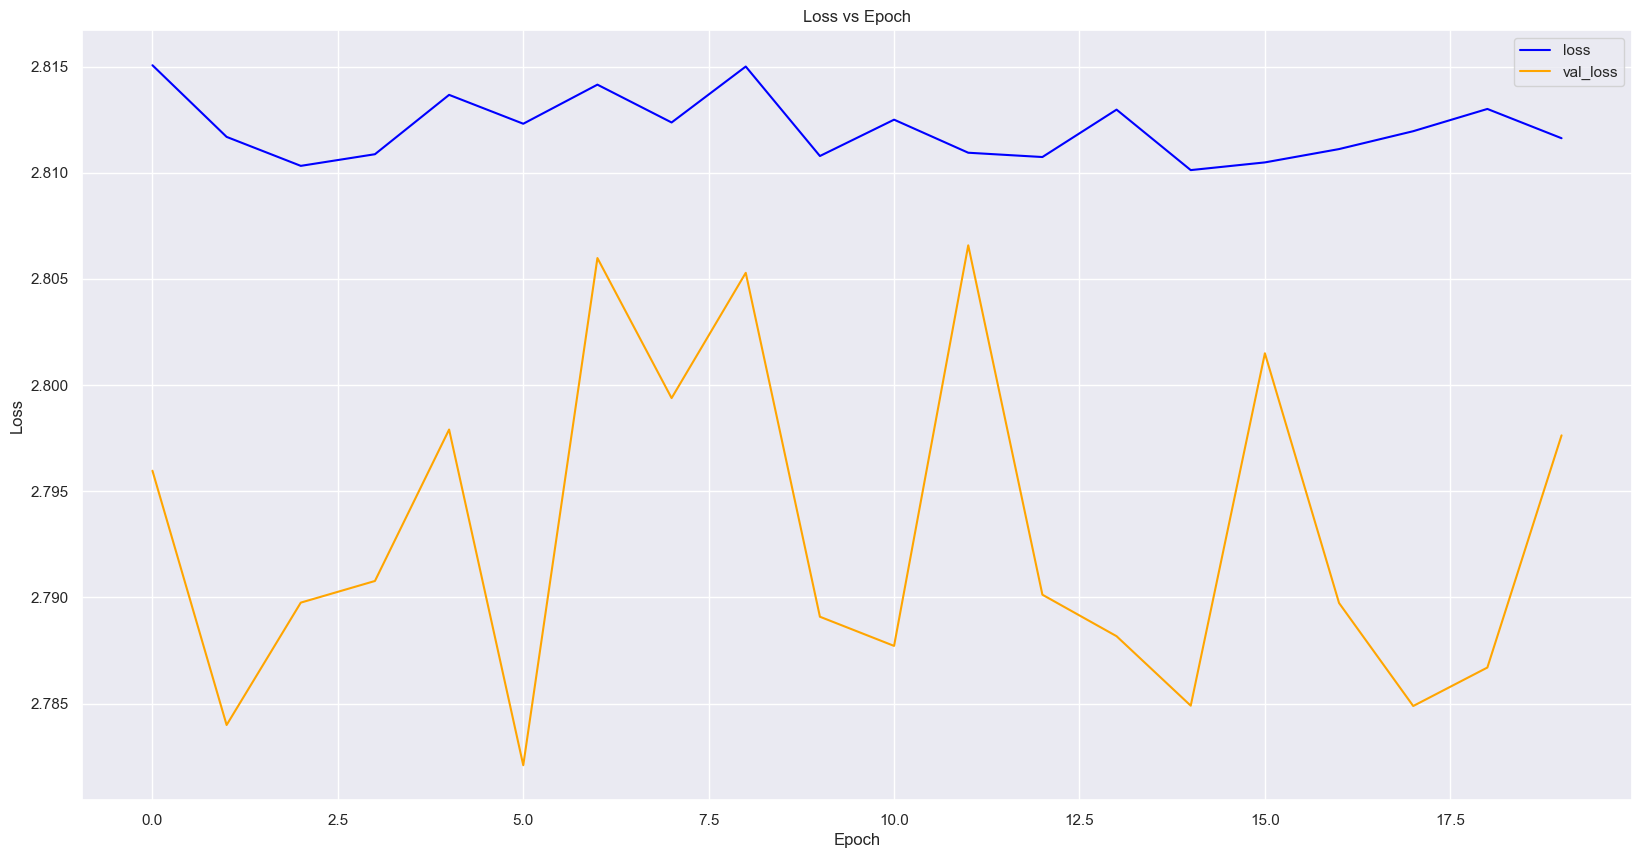

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.1548 - loss: 2.8239
Test Loss: 2.8370954990386963
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.3044 - loss: 2.1128 - val_accuracy: 0.3070 - val_loss: 2.0762
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.2977 - loss: 2.0939 - val_accuracy: 0.3128 - val_loss: 2.0751
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3053 - loss: 2.0781 - val_accuracy: 0.3176 - val_loss: 2.0762
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.3102 - loss: 2.0580 - val_accuracy: 0.3147 - val_loss: 2.0664
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.3031 - loss: 2.0792 - val_accuracy: 0.3157 - val_loss: 2.0702
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.3076 - loss: 2.0794 - val_accuracy: 0.3138 - val_loss: 2.0771
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3175 - loss: 2.0893 - val_accuracy: 0.3167 - val_loss: 2.0650
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.3172 - loss: 2.0681 - val_accurac

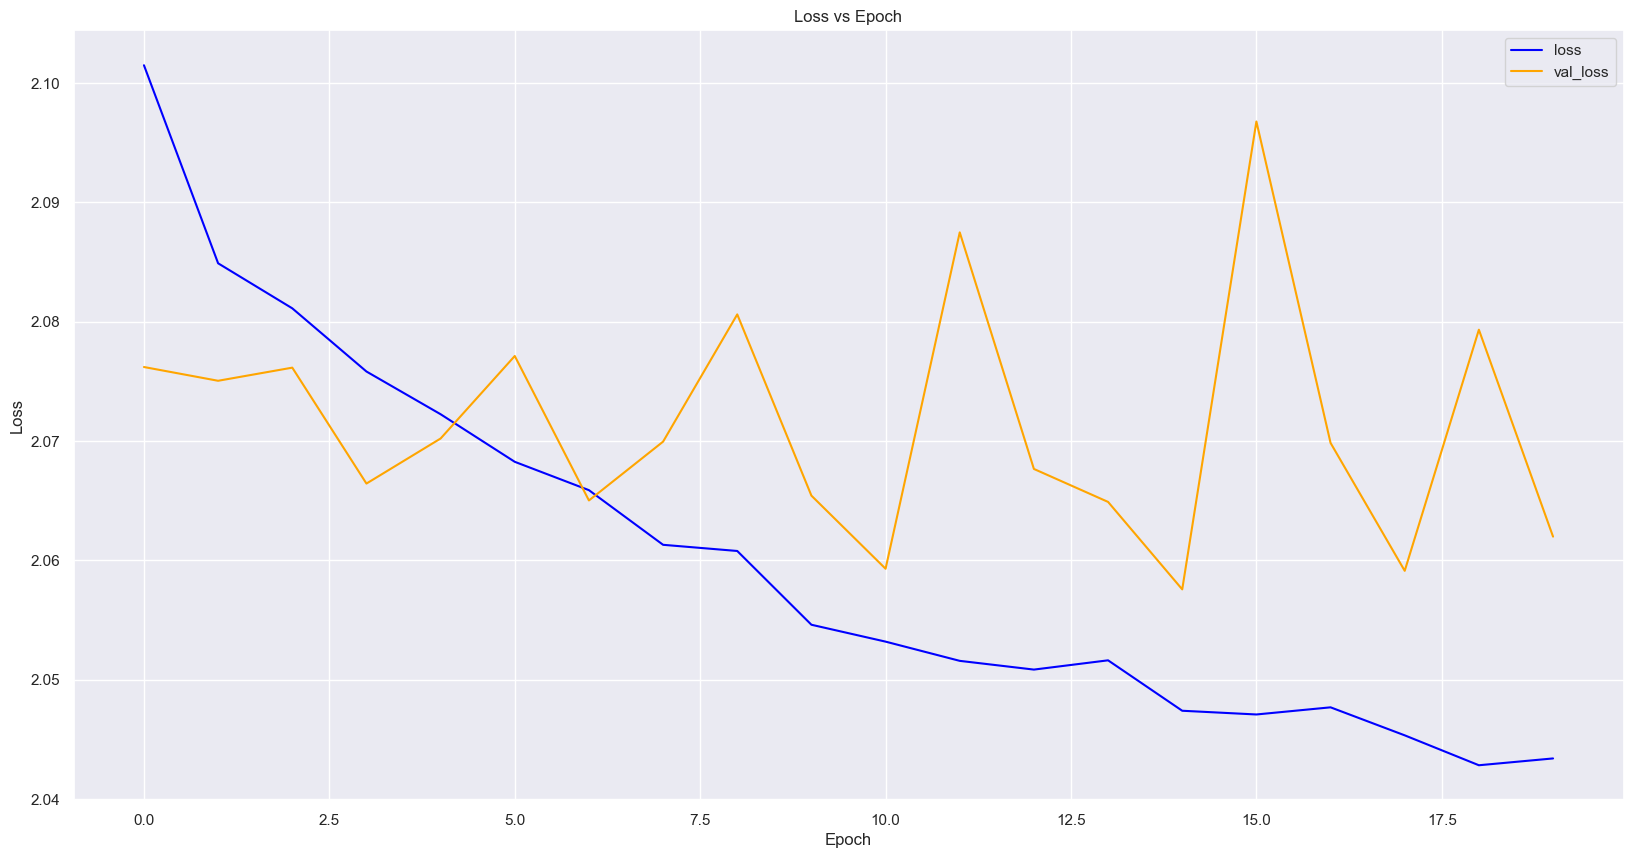

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.3269 - loss: 2.0615
Test Loss: 2.0863120555877686
Test Accuracy: 0.31969448924064636
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
Accuracy: 0.3197
Precision: 0.1545
Recall: 0.3197

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.90      0.63       272
           1       0.31      0.78      0.44       197
           2       0.21      0.52      0.30       161
           3       0.00      0.00      0.00       150
           4       0.21      0.34      0.26       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.27      0.57      0.36        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.3584 - loss: 1.9083 - val_accuracy: 0.3474 - val_loss: 1.9354
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.3662 - loss: 1.8894 - val_accuracy: 0.3590 - val_loss: 1.9151
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3596 - loss: 1.9194 - val_accuracy: 0.3571 - val_loss: 1.9173
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3704 - loss: 1.8802 - val_accuracy: 0.3600 - val_loss: 1.9162
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.3659 - loss: 1.9043 - val_accuracy: 0.3484 - val_loss: 1.9086
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.3668 - loss: 1.8680 - val_accuracy: 0.3378 - val_loss: 1.9198
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3628 - loss: 1.9085 - val_accuracy: 0.3388 - val_loss: 1.9058
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.3745 - loss: 1.8609 - val_accurac

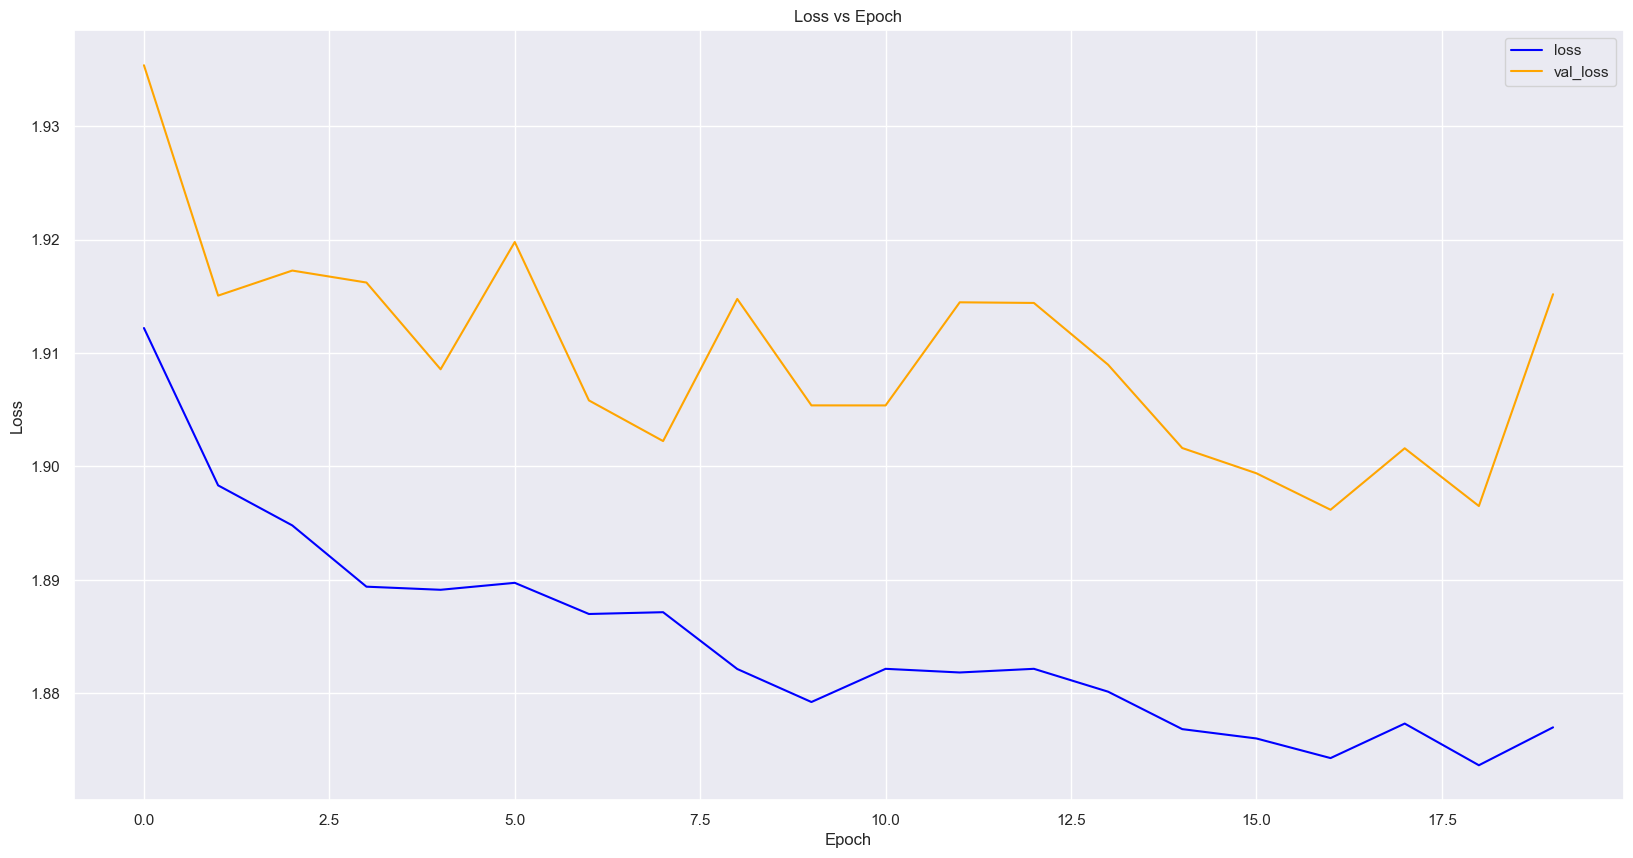

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.3795 - loss: 1.8969
Test Loss: 1.920495867729187
Test Accuracy: 0.36933988332748413
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
Accuracy: 0.3693
Precision: 0.2406
Recall: 0.3693

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.97      0.72       272
           1       0.35      0.81      0.49       197
           2       0.24      0.40      0.30       161
           3       0.25      0.17      0.20       150
           4       0.00      0.00      0.00       145
           5       0.29      0.41      0.34       140
           6       0.25      0.16      0.20       123
           7       0.25      0.31      0.28       115
           8       0.41      0.54      0.47        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.1491 - loss: 2.7956 - val_accuracy: 0.1530 - val_loss: 2.7756
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.1379 - loss: 2.8044 - val_accuracy: 0.1530 - val_loss: 2.7745
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1488 - loss: 2.7863 - val_accuracy: 0.1530 - val_loss: 2.7759
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.1489 - loss: 2.7808 - val_accuracy: 0.1530 - val_loss: 2.7773
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1499 - loss: 2.8015 - val_accuracy: 0.1530 - val_loss: 2.7781
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.1471 - loss: 2.8020 - val_accuracy: 0.1530 - val_loss: 2.7798
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1509 - loss: 2.7878 - val_accuracy: 0.1530 - val_loss: 2.7768
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1480 - loss: 2.7915 - val_accurac

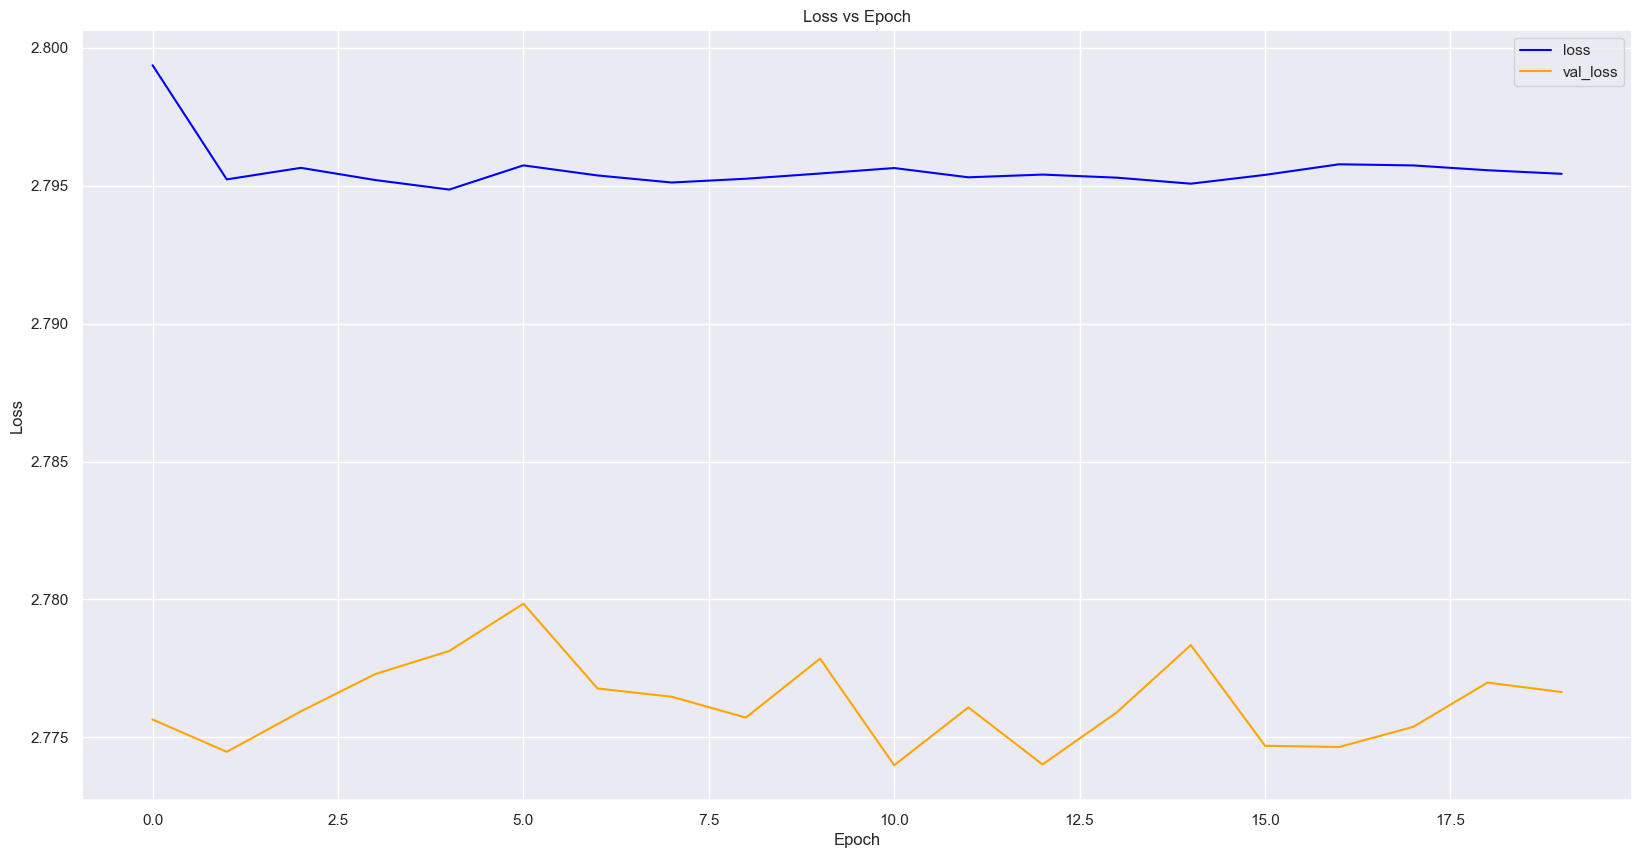

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.1548 - loss: 2.7994
Test Loss: 2.8150603771209717
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.3253 - loss: 2.0463 - val_accuracy: 0.3301 - val_loss: 2.0519
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.3325 - loss: 2.0338 - val_accuracy: 0.3282 - val_loss: 2.0524
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.3257 - loss: 2.0421 - val_accuracy: 0.3234 - val_loss: 2.0558
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.3313 - loss: 2.0415 - val_accuracy: 0.3301 - val_loss: 2.0506
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.3291 - loss: 2.0283 - val_accuracy: 0.3301 - val_loss: 2.0507
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.3301 - loss: 2.0330 - val_accuracy: 0.3244 - val_loss: 2.0500
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.3301 - loss: 2.0400 - val_accuracy: 0.3311 - val_loss: 2.0512
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.3330 - loss: 2.0199 - val_accurac

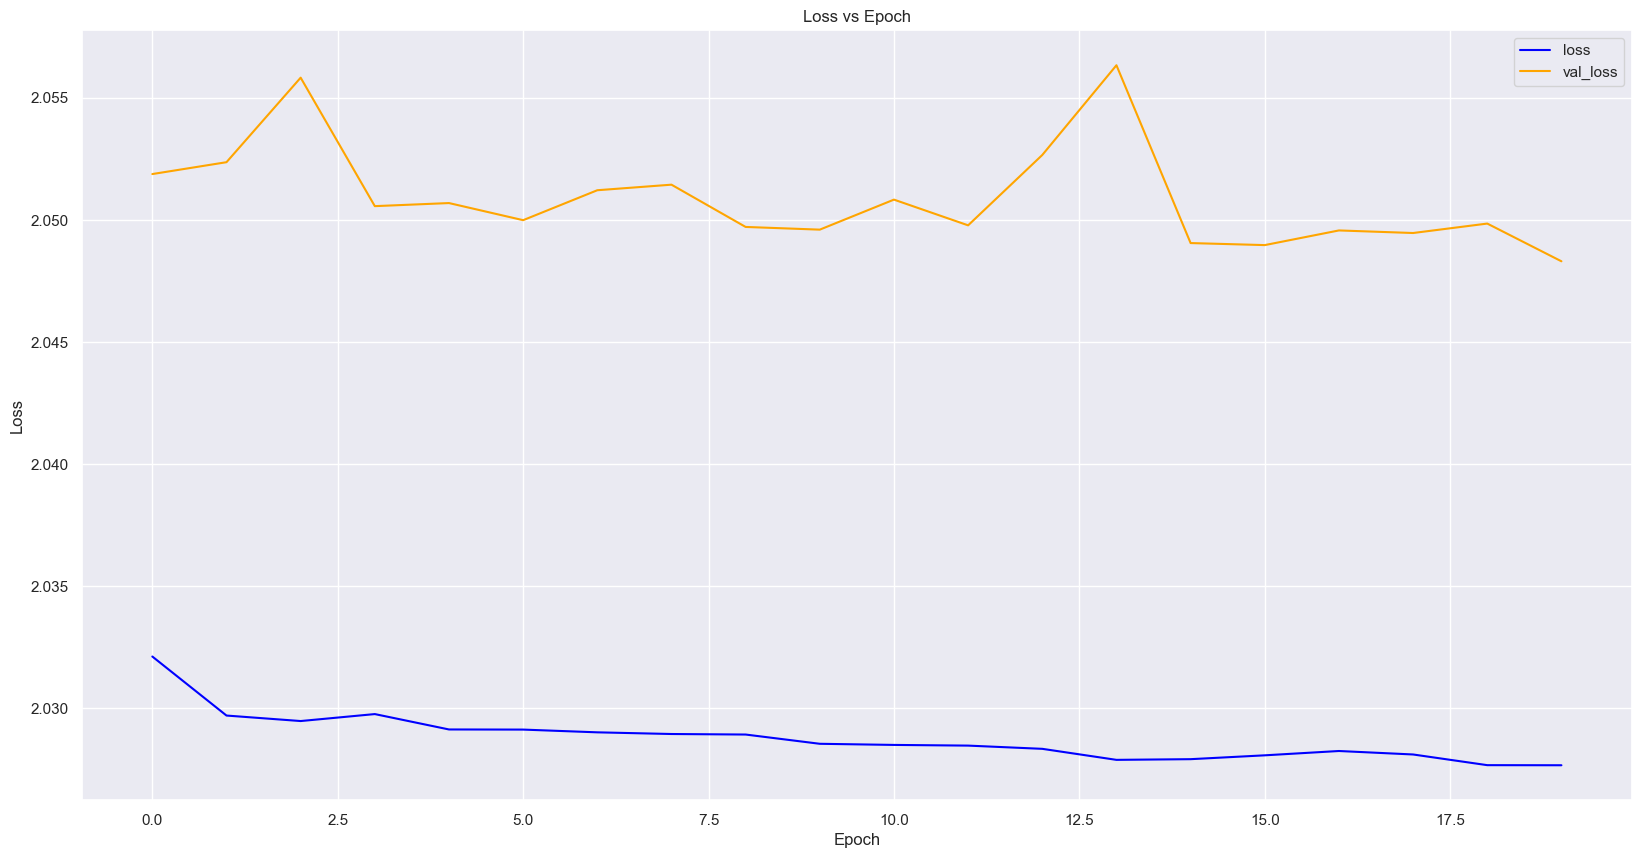

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.3255 - loss: 2.0554
Test Loss: 2.078395366668701
Test Accuracy: 0.3213311433792114
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
Accuracy: 0.3213
Precision: 0.1643
Recall: 0.3213

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.91      0.62       272
           1       0.32      0.76      0.44       197
           2       0.22      0.54      0.31       161
           3       0.00      0.00      0.00       150
           4       0.23      0.34      0.27       145
           5       0.12      0.02      0.04       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.28      0.56      0.37        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.3692 - loss: 1.8783 - val_accuracy: 0.3590 - val_loss: 1.8870
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.3715 - loss: 1.8646 - val_accuracy: 0.3561 - val_loss: 1.8853
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.3808 - loss: 1.8591 - val_accuracy: 0.3542 - val_loss: 1.8866
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3725 - loss: 1.8487 - val_accuracy: 0.3580 - val_loss: 1.8850
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.3771 - loss: 1.8615 - val_accuracy: 0.3590 - val_loss: 1.8842
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.3676 - loss: 1.8661 - val_accuracy: 0.3561 - val_loss: 1.8850
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.3758 - loss: 1.8479 - val_accuracy: 0.3561 - val_loss: 1.8834
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.3740 - loss: 1.8497 - val_accurac

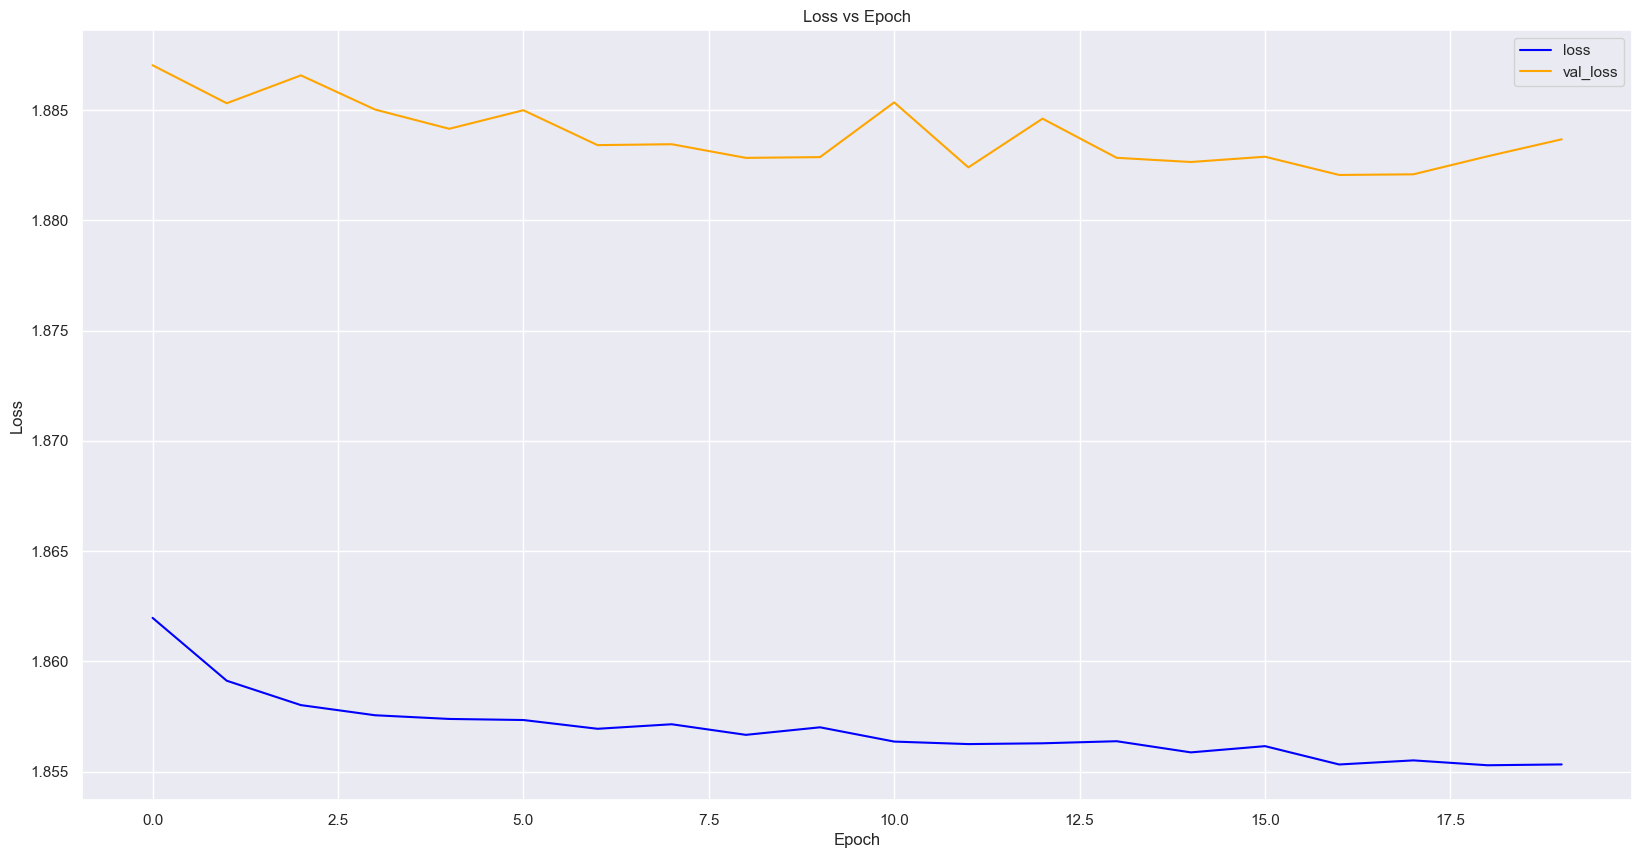

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.3719 - loss: 1.8760
Test Loss: 1.892130732536316
Test Accuracy: 0.36224767565727234
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
Accuracy: 0.3622
Precision: 0.2416
Recall: 0.3622

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73       272
           1       0.37      0.74      0.49       197
           2       0.23      0.37      0.28       161
           3       0.26      0.25      0.25       150
           4       0.23      0.34      0.27       145
           5       0.00      0.00      0.00       140
           6       0.23      0.23      0.23       123
           7       0.27      0.37      0.32       115
           8       0.40      0.49      0.44        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.1459 - loss: 2.7839 - val_accuracy: 0.1530 - val_loss: 2.7759
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.1477 - loss: 2.7795 - val_accuracy: 0.1530 - val_loss: 2.7757
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1463 - loss: 2.7913 - val_accuracy: 0.1530 - val_loss: 2.7754
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.1450 - loss: 2.7952 - val_accuracy: 0.1530 - val_loss: 2.7752
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1519 - loss: 2.7957 - val_accuracy: 0.1530 - val_loss: 2.7753
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.1495 - loss: 2.7999 - val_accuracy: 0.1530 - val_loss: 2.7753
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.1401 - loss: 2.8001 - val_accuracy: 0.1530 - val_loss: 2.7753
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.1512 - loss: 2.7827 - val_accurac

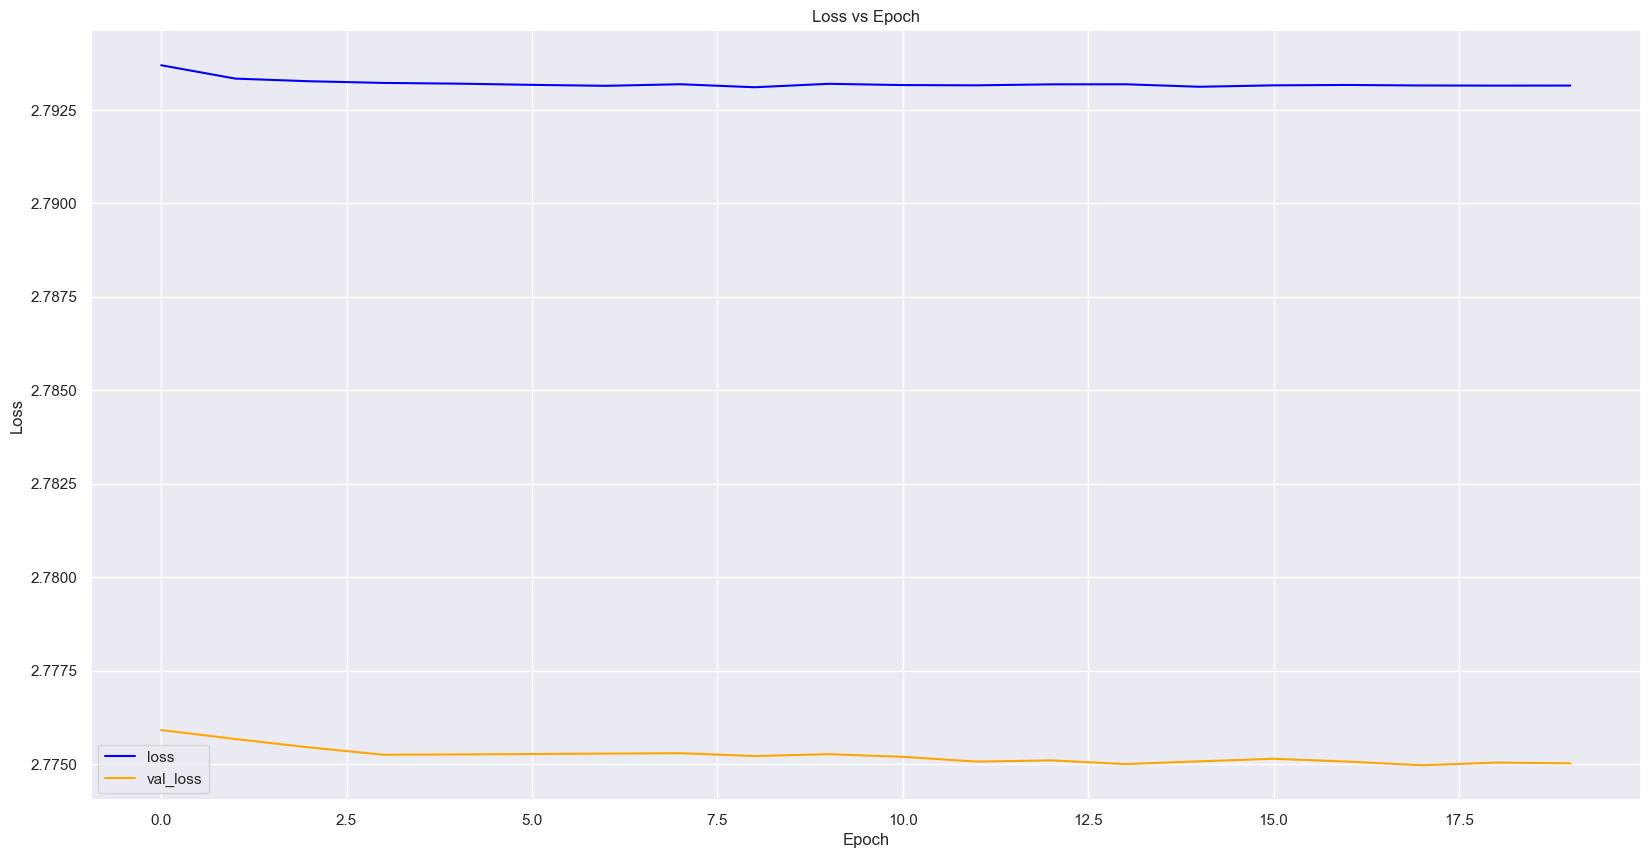

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.1548 - loss: 2.7981
Test Loss: 2.8135595321655273
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.2897 - loss: 2.1862 - val_accuracy: 0.3128 - val_loss: 2.0953
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.3096 - loss: 2.1203 - val_accuracy: 0.2782 - val_loss: 2.2587
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.2888 - loss: 2.1620 - val_accuracy: 0.2955 - val_loss: 2.1313
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.2941 - loss: 2.1622 - val_accuracy: 0.2753 - val_loss: 2.1261
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.3086 - loss: 2.1354 - val_accuracy: 0.3263 - val_loss: 2.1111
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.3072 - loss: 2.1303 - val_accuracy: 0.3003 - val_loss: 2.1132
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.3078 - loss: 2.1292 - val_accuracy: 0.2907 - val_loss: 2.2079
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.3037 - loss: 2.1481 - val_accurac

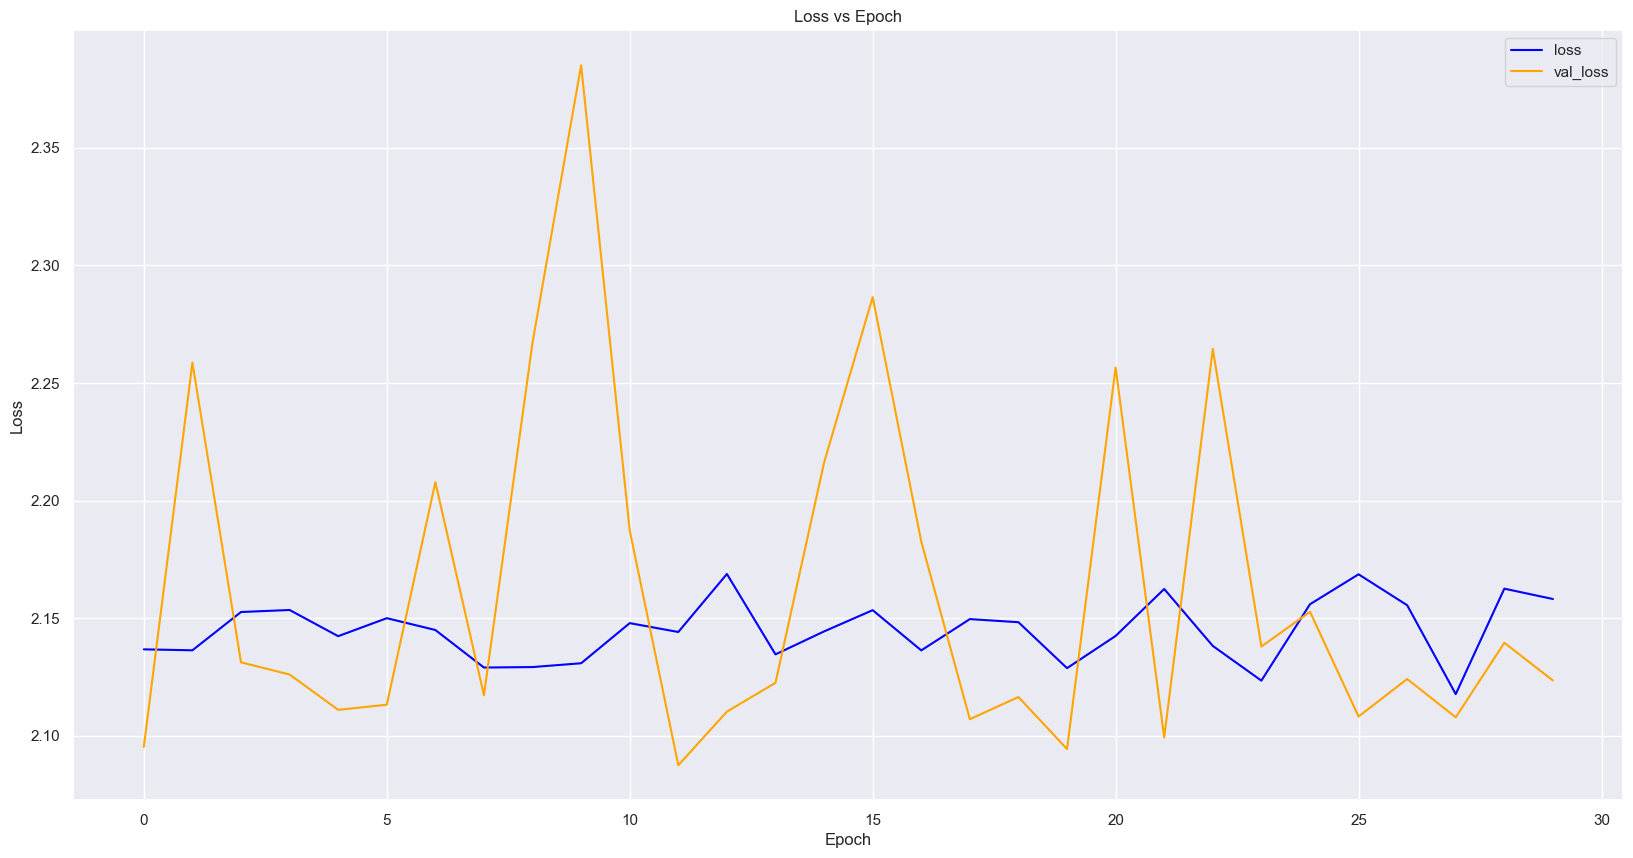

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.2975 - loss: 2.1678
Test Loss: 2.1735334396362305
Test Accuracy: 0.30223676562309265
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
Accuracy: 0.3022
Precision: 0.1557
Recall: 0.3022

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       272
           1       0.34      0.54      0.42       197
           2       0.20      0.87      0.32       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.19      0.56      0.28       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.3221 - loss: 2.0712 - val_accuracy: 0.3167 - val_loss: 2.1034
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.3386 - loss: 1.9949 - val_accuracy: 0.3359 - val_loss: 1.9639
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.3388 - loss: 2.0113 - val_accuracy: 0.3282 - val_loss: 2.0115
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.3357 - loss: 2.0059 - val_accuracy: 0.3446 - val_loss: 1.9988
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.3403 - loss: 2.0017 - val_accuracy: 0.2916 - val_loss: 2.0665
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.3314 - loss: 2.0247 - val_accuracy: 0.3195 - val_loss: 2.0428
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.3377 - loss: 1.9839 - val_accuracy: 0.3590 - val_loss: 1.9572
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.3473 - loss: 1.9883 - val_accurac

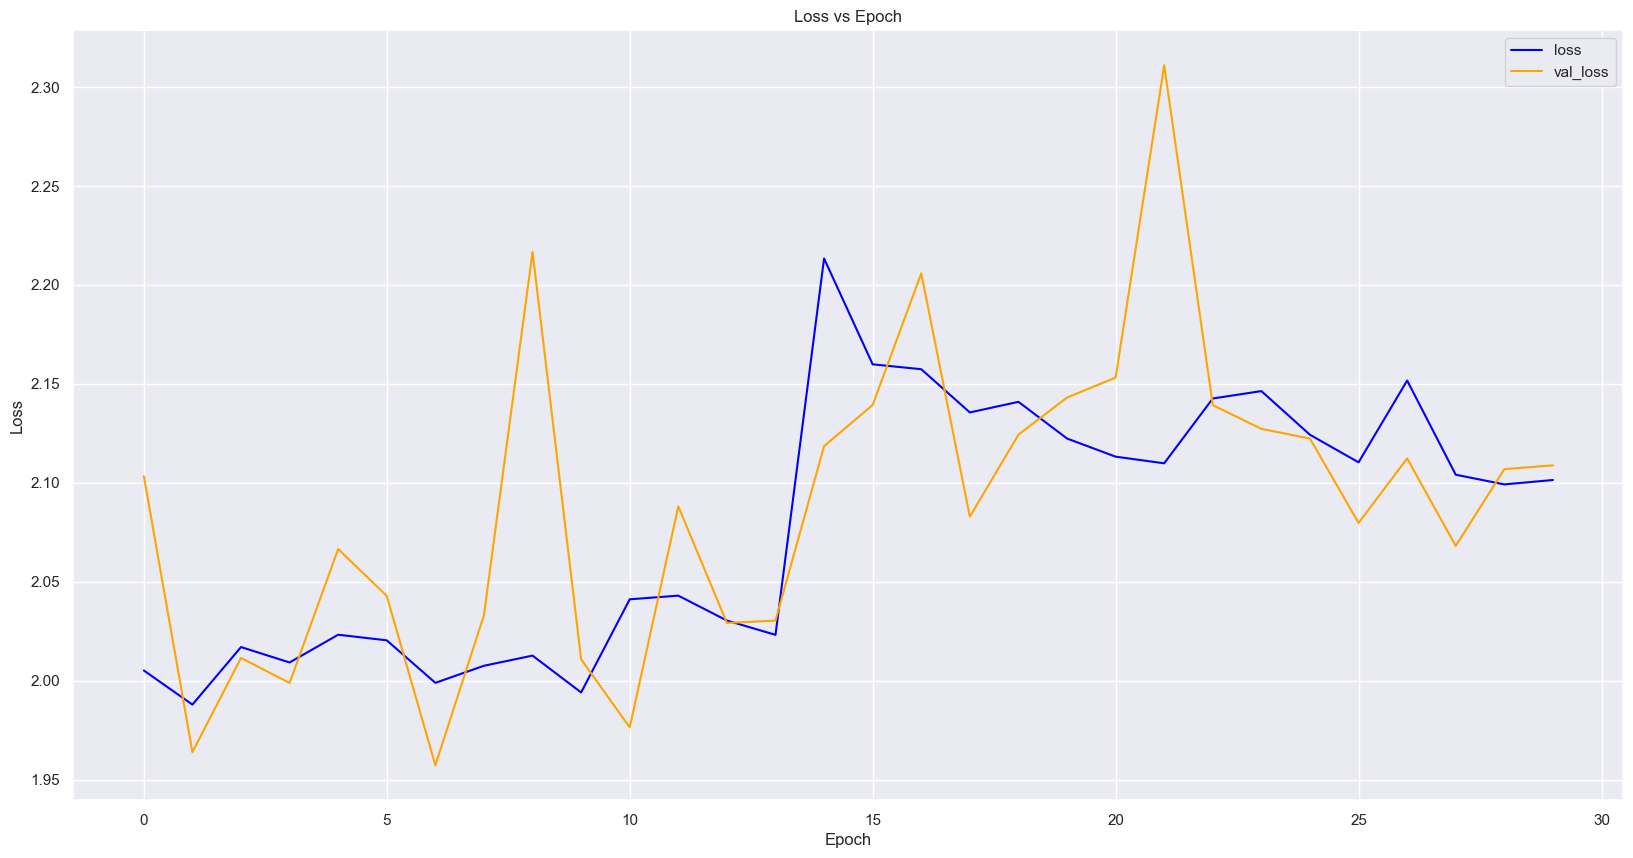

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.3249 - loss: 2.0820
Test Loss: 2.095324993133545
Test Accuracy: 0.3240589201450348
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
Accuracy: 0.3241
Precision: 0.1941
Recall: 0.3241

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       272
           1       0.33      0.37      0.35       197
           2       0.21      0.55      0.30       161
           3       0.00      0.00      0.00       150
           4       0.21      0.73      0.33       145
           5       0.00      0.00      0.00       140
           6       0.14      0.11      0.12       123
           7       0.00      0.00      0.00       115
           8       0.35      0.88      0.50        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00 

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.1390 - loss: 2.8196 - val_accuracy: 0.1530 - val_loss: 2.7901
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.1515 - loss: 2.8099 - val_accuracy: 0.1530 - val_loss: 2.7854
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.1316 - loss: 2.8190 - val_accuracy: 0.1530 - val_loss: 2.7899
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.1421 - loss: 2.8126 - val_accuracy: 0.1530 - val_loss: 2.8078
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.1382 - loss: 2.8068 - val_accuracy: 0.1530 - val_loss: 2.7964
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.1405 - loss: 2.8055 - val_accuracy: 0.1530 - val_loss: 2.7904
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.1441 - loss: 2.7989 - val_accuracy: 0.1530 - val_loss: 2.8035
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.1412 - loss: 2.8107 - val_accurac

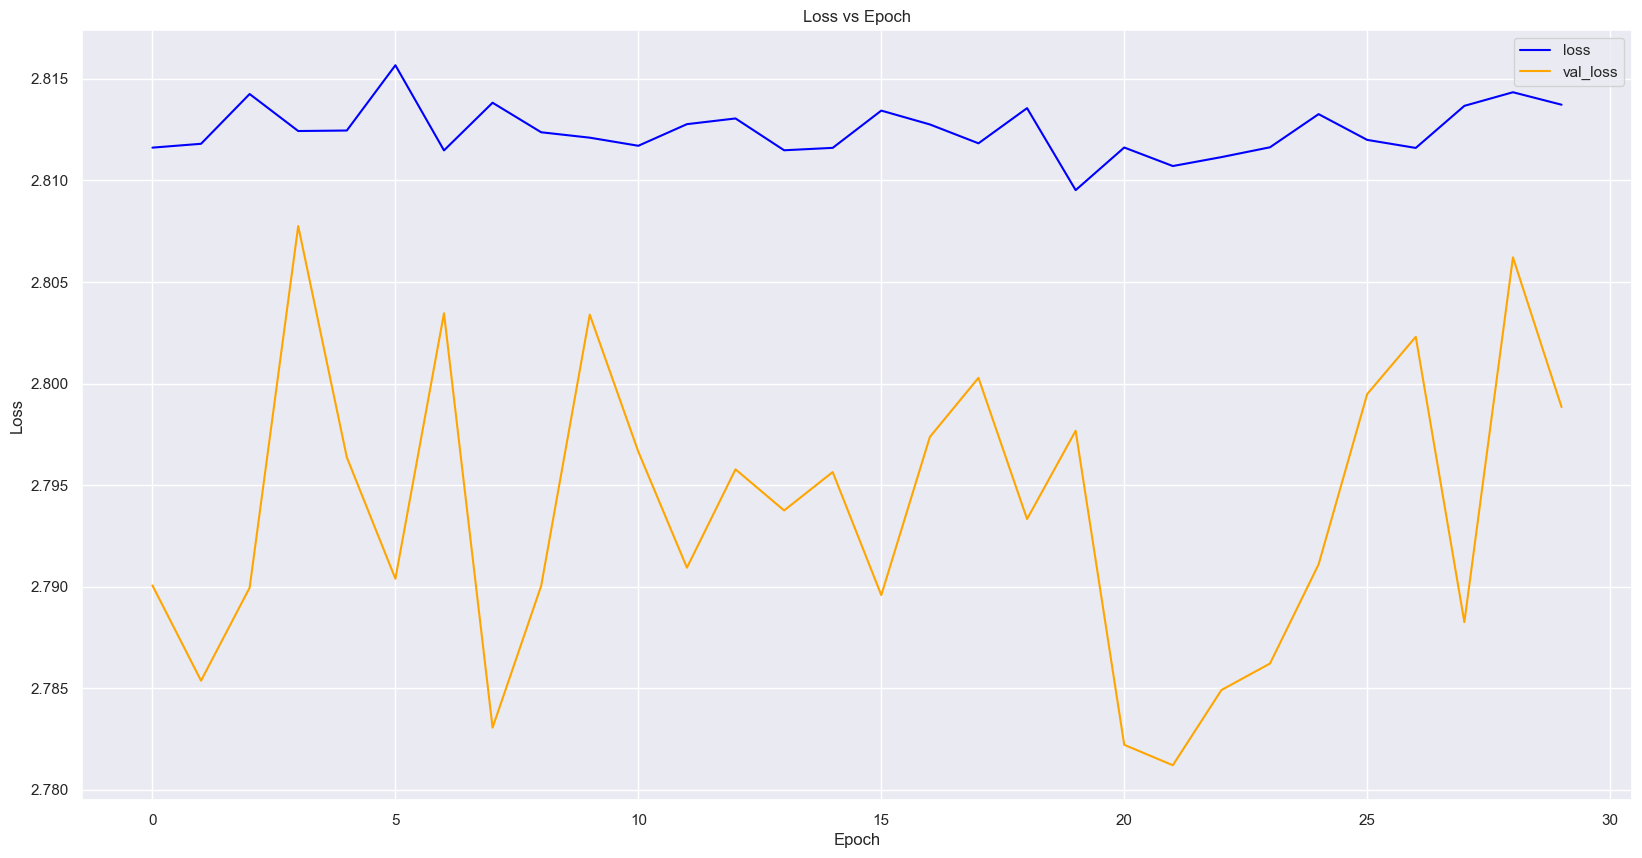

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.1064 - loss: 2.8163
Test Loss: 2.8312125205993652
Test Accuracy: 0.10747408866882324
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
Accuracy: 0.1075
Precision: 0.0116
Recall: 0.1075

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       272
           1       0.11      1.00      0.19       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.3069 - loss: 2.0690 - val_accuracy: 0.3244 - val_loss: 2.0764
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.3216 - loss: 2.0434 - val_accuracy: 0.3013 - val_loss: 2.0931
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.3255 - loss: 2.0524 - val_accuracy: 0.3186 - val_loss: 2.0641
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.3266 - loss: 2.0301 - val_accuracy: 0.3176 - val_loss: 2.0665
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.3290 - loss: 2.0419 - val_accuracy: 0.3292 - val_loss: 2.0656
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3232 - loss: 2.0390 - val_accuracy: 0.3205 - val_loss: 2.0594
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3220 - loss: 2.0507 - val_accuracy: 0.3138 - val_loss: 2.0652
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.3321 - loss: 2.0430 - val_accurac

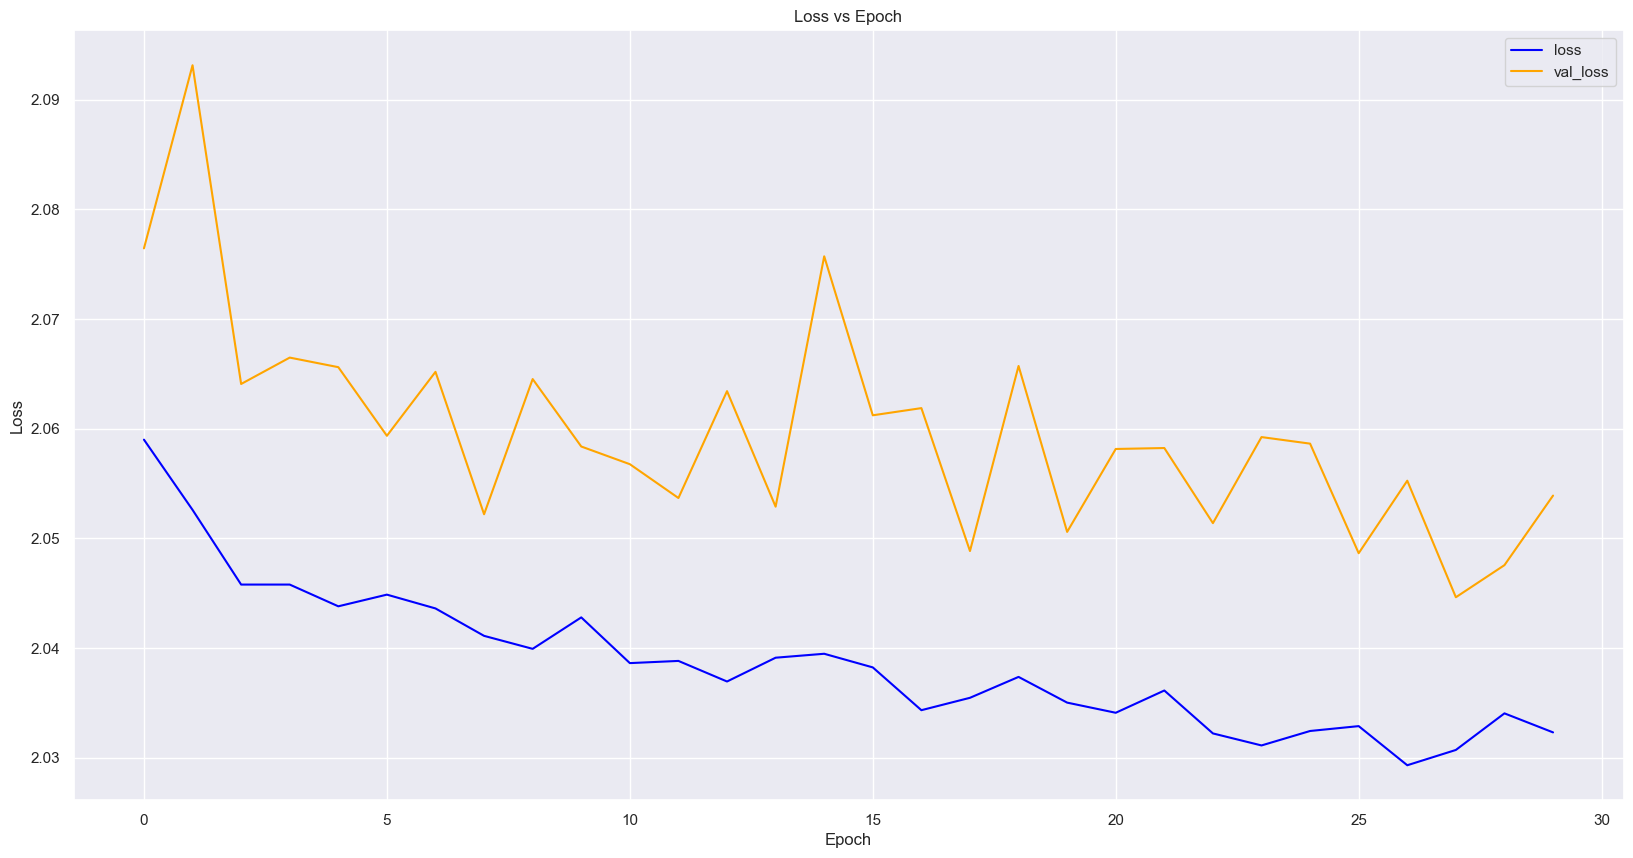

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.3337 - loss: 2.0520
Test Loss: 2.0780081748962402
Test Accuracy: 0.3218767046928406
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
Accuracy: 0.3219
Precision: 0.1550
Recall: 0.3219

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.90      0.63       272
           1       0.31      0.77      0.45       197
           2       0.22      0.55      0.31       161
           3       0.00      0.00      0.00       150
           4       0.21      0.34      0.26       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.29      0.58      0.39        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.3323 - loss: 2.0382 - val_accuracy: 0.3244 - val_loss: 2.0378
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.3338 - loss: 2.0056 - val_accuracy: 0.3234 - val_loss: 2.0357
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.3340 - loss: 2.0202 - val_accuracy: 0.3330 - val_loss: 2.0274
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.3418 - loss: 1.9993 - val_accuracy: 0.3397 - val_loss: 2.0172
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.3263 - loss: 2.0039 - val_accuracy: 0.3484 - val_loss: 2.0150
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.3425 - loss: 2.0003 - val_accuracy: 0.3272 - val_loss: 2.0200
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.3309 - loss: 1.9881 - val_accuracy: 0.3311 - val_loss: 2.0113
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.3446 - loss: 1.9508 - val_accurac

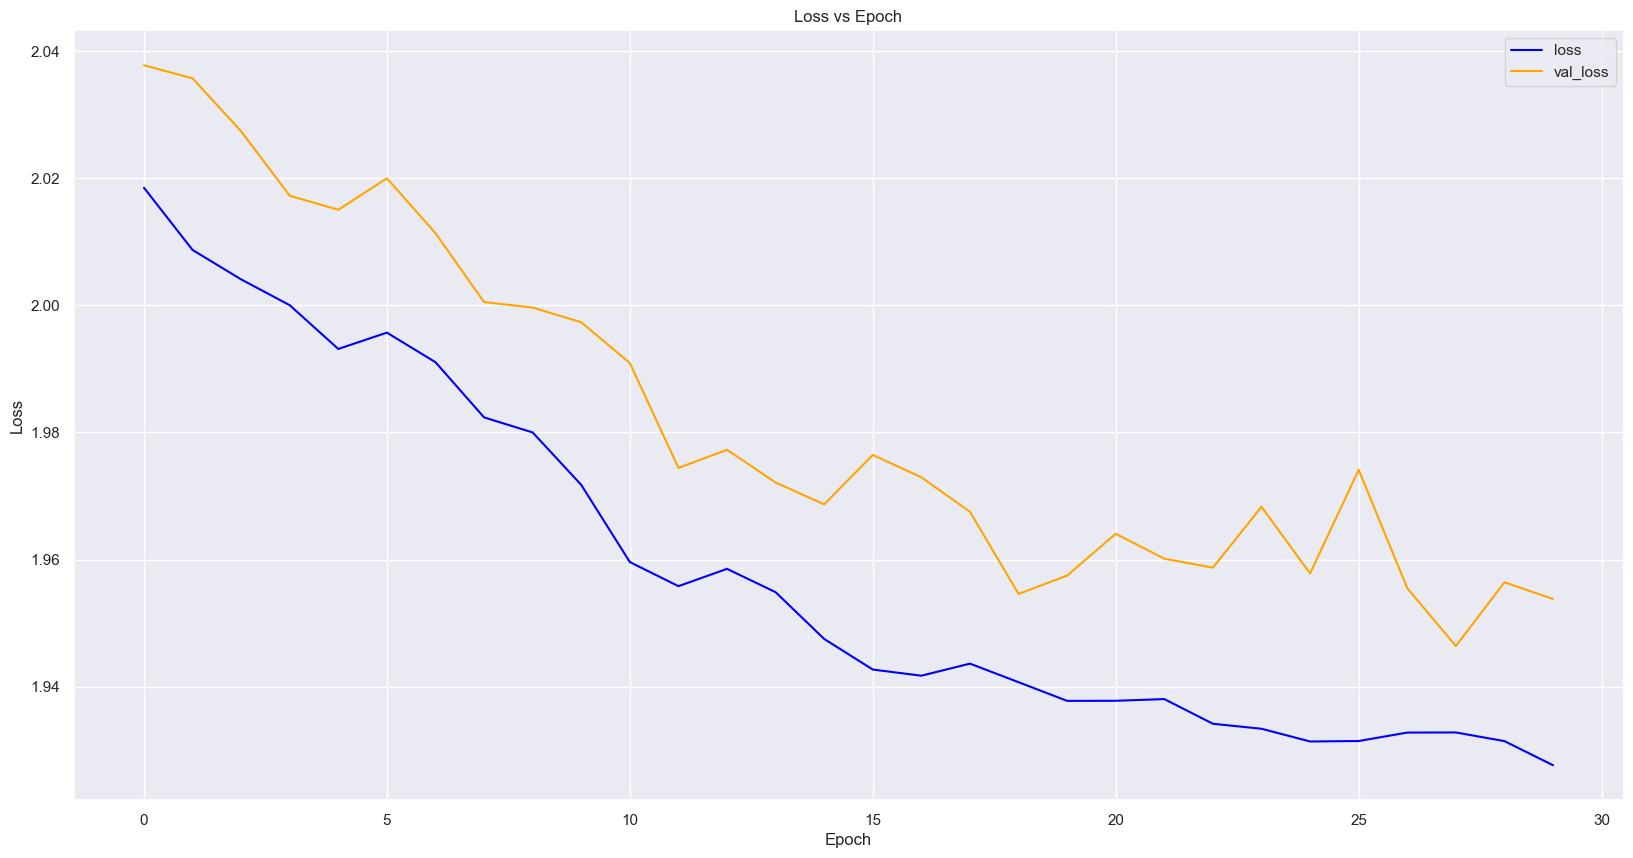

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.3519 - loss: 1.9527
Test Loss: 1.9707000255584717
Test Accuracy: 0.3535188138484955
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
Accuracy: 0.3535
Precision: 0.1752
Recall: 0.3535

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.94      0.70       272
           1       0.31      0.87      0.46       197
           2       0.00      0.00      0.00       161
           3       0.26      0.73      0.38       150
           4       0.22      0.40      0.28       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.41      0.56      0.48        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.1473 - loss: 2.8062 - val_accuracy: 0.1530 - val_loss: 2.7733
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1486 - loss: 2.7803 - val_accuracy: 0.1530 - val_loss: 2.7769
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1458 - loss: 2.8082 - val_accuracy: 0.1530 - val_loss: 2.7781
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.1445 - loss: 2.7980 - val_accuracy: 0.1530 - val_loss: 2.7756
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.1465 - loss: 2.8066 - val_accuracy: 0.1530 - val_loss: 2.7742
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.1420 - loss: 2.8026 - val_accuracy: 0.1530 - val_loss: 2.7768
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.1448 - loss: 2.7976 - val_accuracy: 0.1530 - val_loss: 2.7758
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1463 - loss: 2.7900 - val_accurac

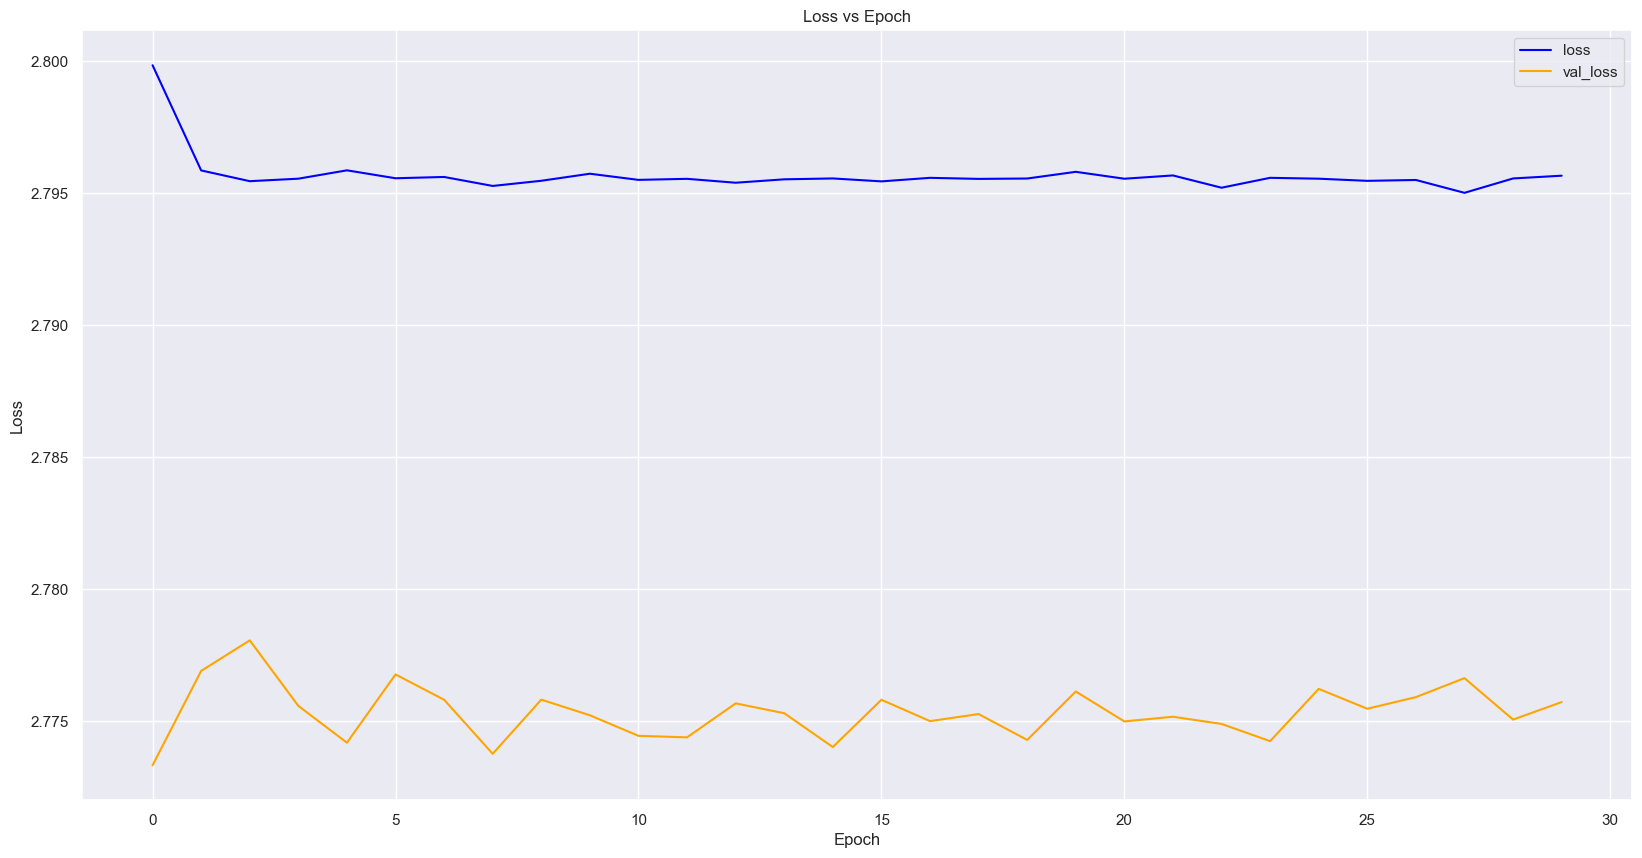

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.1548 - loss: 2.7973
Test Loss: 2.8131461143493652
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.3373 - loss: 2.0201 - val_accuracy: 0.3311 - val_loss: 2.0439
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.3319 - loss: 2.0113 - val_accuracy: 0.3311 - val_loss: 2.0429
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.3357 - loss: 2.0290 - val_accuracy: 0.3378 - val_loss: 2.0413
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.3384 - loss: 2.0004 - val_accuracy: 0.3311 - val_loss: 2.0414
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.3301 - loss: 2.0109 - val_accuracy: 0.3340 - val_loss: 2.0406
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.3413 - loss: 2.0208 - val_accuracy: 0.3224 - val_loss: 2.0426
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.3317 - loss: 2.0121 - val_accuracy: 0.3321 - val_loss: 2.0415
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.3274 - loss: 2.0407 - val_accurac

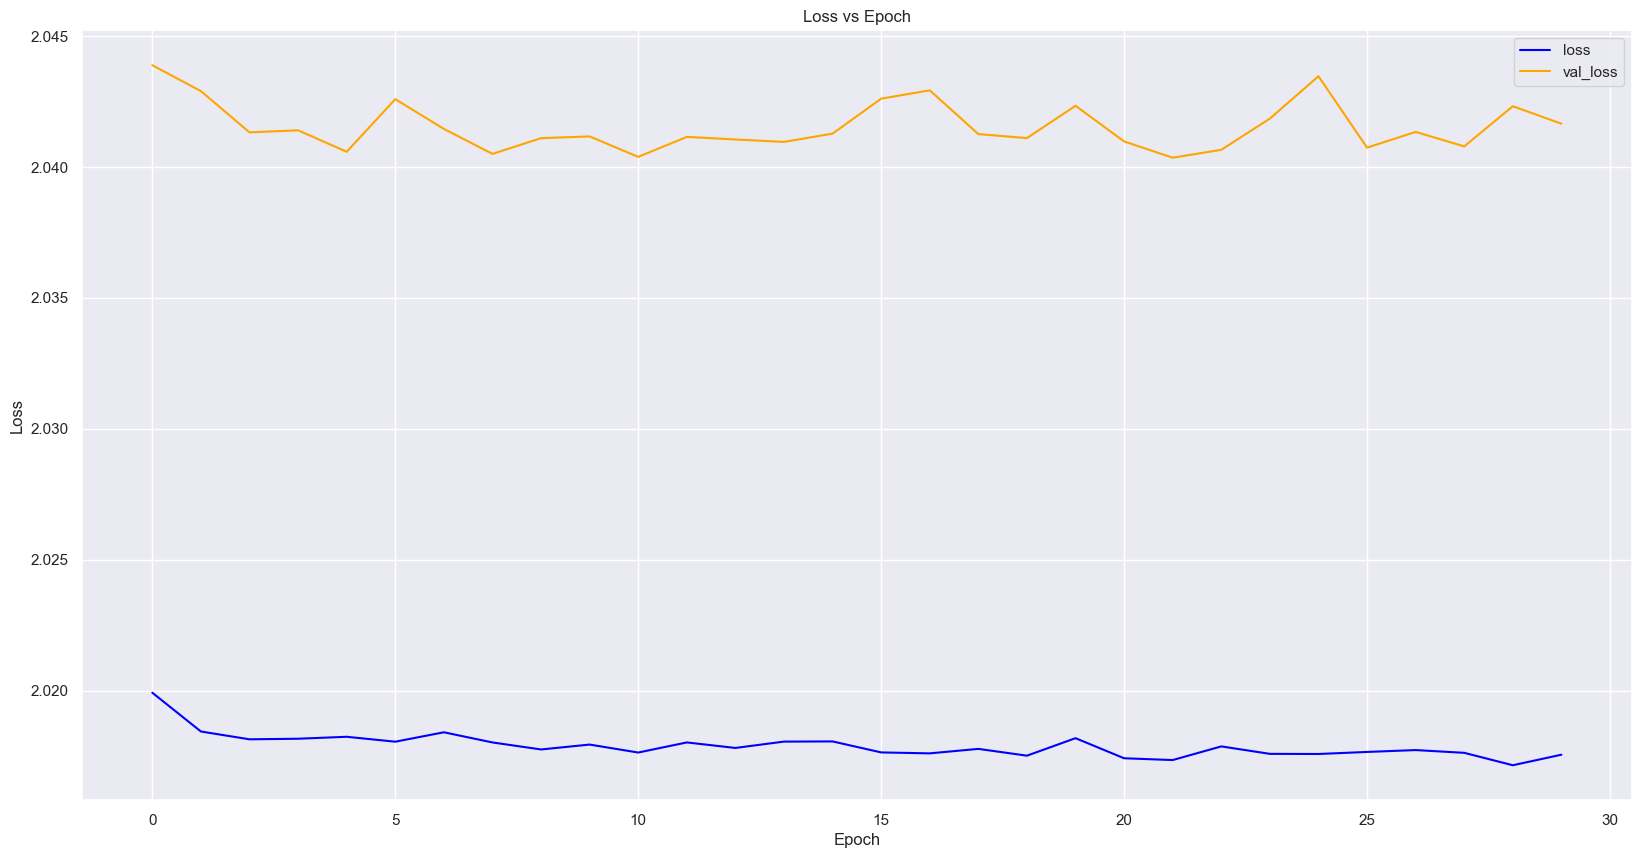

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.3221 - loss: 2.0466
Test Loss: 2.071967601776123
Test Accuracy: 0.32351335883140564
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
Accuracy: 0.3235
Precision: 0.1710
Recall: 0.3235

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.91      0.62       272
           1       0.31      0.77      0.44       197
           2       0.23      0.58      0.33       161
           3       0.00      0.00      0.00       150
           4       0.20      0.18      0.19       145
           5       0.21      0.17      0.19       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.32      0.54      0.40        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.3654 - loss: 1.9009 - val_accuracy: 0.3378 - val_loss: 1.9443
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.3606 - loss: 1.9360 - val_accuracy: 0.3388 - val_loss: 1.9443
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.3662 - loss: 1.9124 - val_accuracy: 0.3369 - val_loss: 1.9441
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.3634 - loss: 1.9236 - val_accuracy: 0.3446 - val_loss: 1.9466
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.3580 - loss: 1.9185 - val_accuracy: 0.3474 - val_loss: 1.9433
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.3640 - loss: 1.9064 - val_accuracy: 0.3446 - val_loss: 1.9437
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.3565 - loss: 1.9119 - val_accuracy: 0.3523 - val_loss: 1.9476
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.3586 - loss: 1.9253 - val_accurac

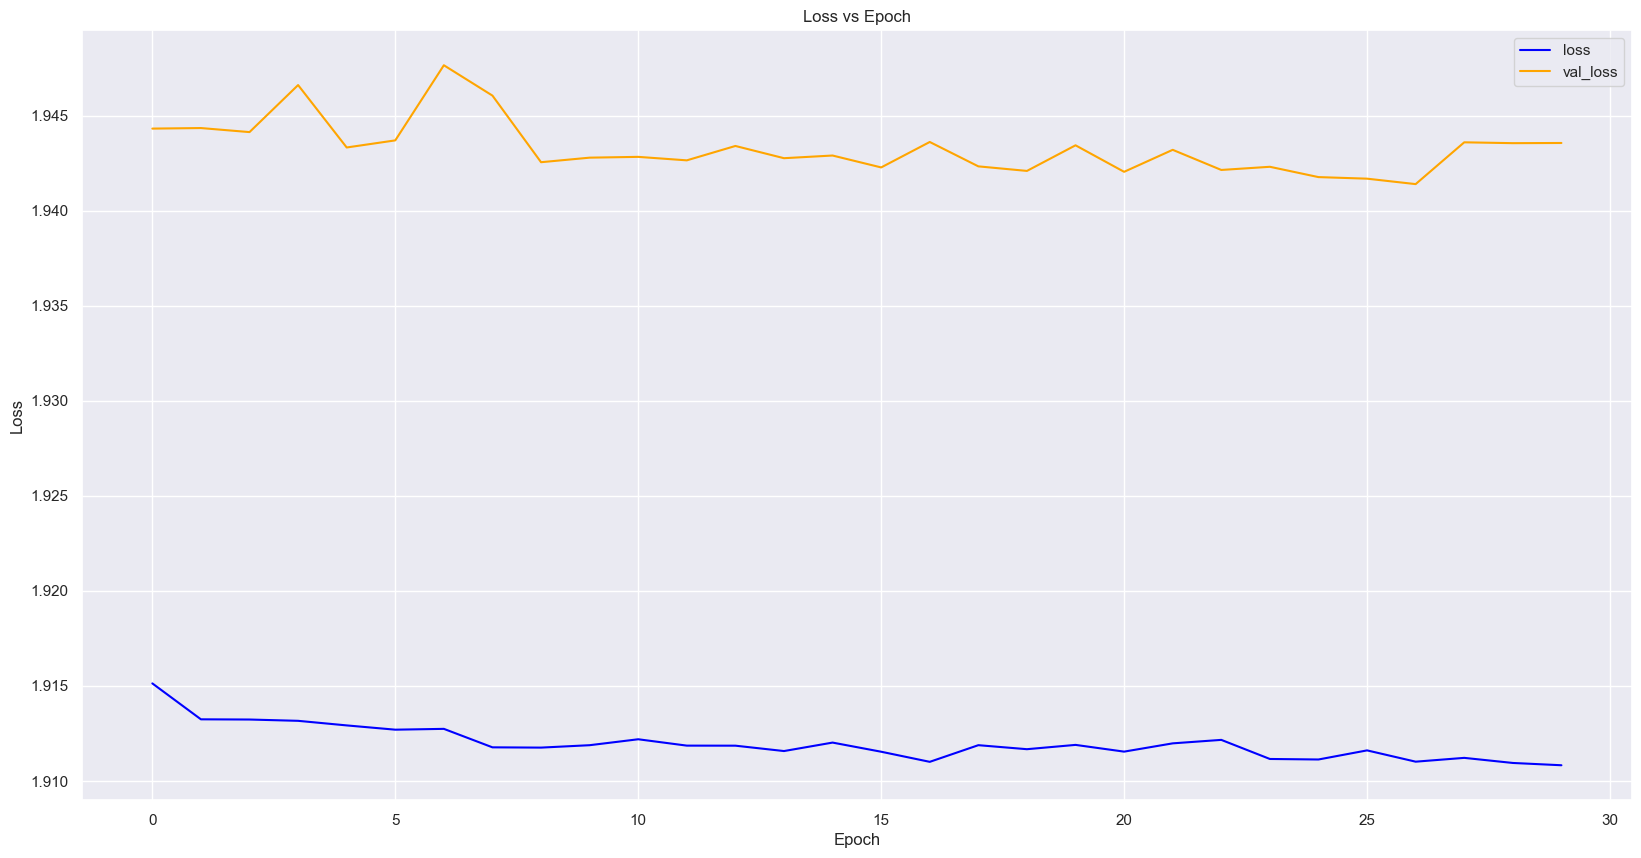

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.3515 - loss: 1.9399
Test Loss: 1.9581366777420044
Test Accuracy: 0.34806329011917114
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
Accuracy: 0.3481
Precision: 0.1983
Recall: 0.3481

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       272
           1       0.32      0.78      0.45       197
           2       0.20      0.38      0.27       161
           3       0.28      0.26      0.27       150
           4       0.22      0.46      0.30       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.36      0.69      0.48        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.0

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.1415 - loss: 2.7982 - val_accuracy: 0.1530 - val_loss: 2.7753
Epoch 2/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.1491 - loss: 2.7919 - val_accuracy: 0.1530 - val_loss: 2.7752
Epoch 3/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1453 - loss: 2.7975 - val_accuracy: 0.1530 - val_loss: 2.7750
Epoch 4/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.1438 - loss: 2.7969 - val_accuracy: 0.1530 - val_loss: 2.7749
Epoch 5/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.1498 - loss: 2.7905 - val_accuracy: 0.1530 - val_loss: 2.7749
Epoch 6/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.1407 - loss: 2.8043 - val_accuracy: 0.1530 - val_loss: 2.7749
Epoch 7/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.1398 - loss: 2.7909 - val_accuracy: 0.1530 - val_loss: 2.7750
Epoch 8/30
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.1441 - loss: 2.7849 - val_accurac

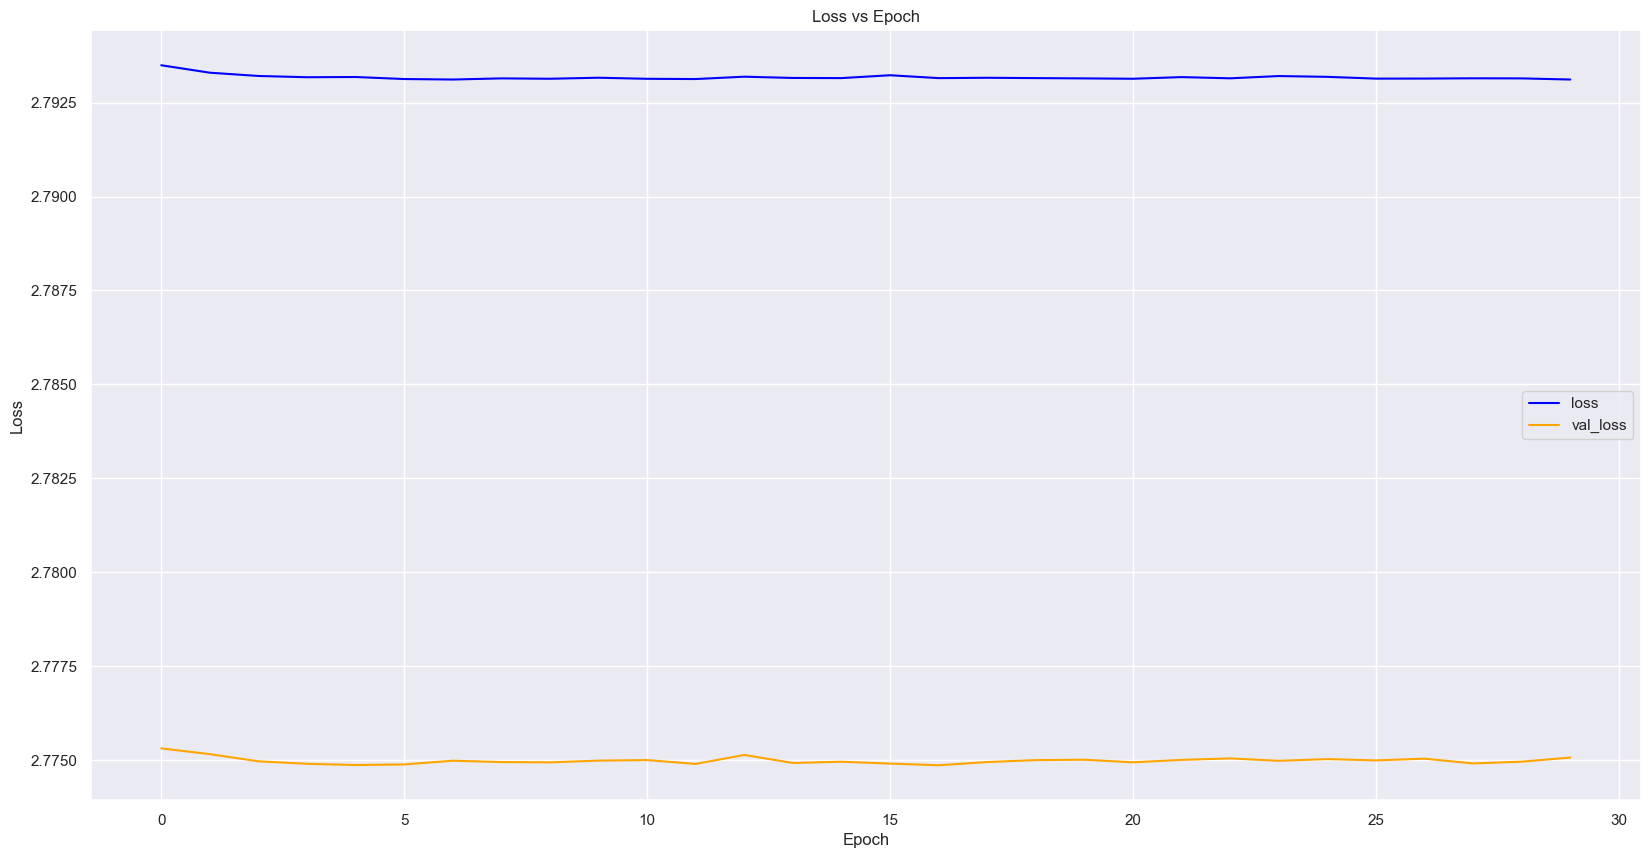

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.1548 - loss: 2.7979
Test Loss: 2.813385248184204
Test Accuracy: 0.14839062094688416
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
Accuracy: 0.1484
Precision: 0.0220
Recall: 0.1484

Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       272
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       161
           3       0.00      0.00      0.00       150
           4       0.00      0.00      0.00       145
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       123
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00

/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adwaiy/Documents/Projects/Python/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [241]:
epochs = [10, 20, 30]
learningRates = [0.1, 0.01, 0.001]

batch_size = 32

for epoch in epochs:
    for rate in learningRates:
        runModels(model1, rate, epoch)
        runModels(model2, rate, epoch)
        runModels(model3, rate, epoch)